In [1]:
# only adjust settings in this cell
state = 'IA'
root_name = 'Polk'     # which county will root our first district 
k = 4                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 4 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 797592
Single district upper population limit U = 797593


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Polk County to be the root. In our graph, this is vertex # 8


In [6]:
from optimization import districting_heuristic

plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-19
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 745 rows, 865 columns and 3665 nonzeros
Model fingerprint: 0x0e84edb4
Variable types: 445 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 109 rows and 109 columns
Presolve time: 0.01s
Presolved: 636 rows, 756 columns, 3002 nonzeros
Variable types: 436 continuous, 320 integer (320 binary)

Root relaxation: objective 5.547523e+00, 176 iterations, 

 1126269 401169 infeasible   63               -   23.26021      -  27.8  185s
 1150580 402106   25.14828   36   37          -   23.35720      -  27.7  190s
 1177182 402579   26.00000   59    8          -   23.46681      -  27.7  195s
 1212898 403809   24.71642   25  128          -   23.62250      -  27.6  200s
 1233552 404461   24.02154   65    4          -   23.71868      -  27.6  205s
 1268585 405029 infeasible   42               -   23.89093      -  27.5  210s
 1297148 407783   24.32201   51   24          -   24.00000      -  27.4  215s
 1320561 414122   24.40523   43    7          -   24.00000      -  27.3  220s
found [0, 4, 8, 16, 18, 30, 36, 49, 50, 57, 64, 74, 81, 89] with objective = 25
   replaced worse solution with objective = 27
adding cut saying that objective should be less than 27
found [0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91] with objective = 26
   replaced worse solution with objective = 27
adding cut saying that objective should be less than 26
 1353151 4

 1961400 873159   35.52034   43   30          -   19.63919      -  28.1  270s
 1997461 888770   27.00000   49    8          -   19.68581      -  28.1  275s
 2029686 902731   29.46578   50   25          -   19.72440      -  28.0  280s
 2063771 917111   25.31817   41   40          -   19.76881      -  28.0  285s
found [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91] with objective = 23
   ^added to list!
 2099418 931996   28.41600   43   22          -   19.82428      -  28.0  290s
 2131934 945712   50.77912   58   66          -   19.87533      -  27.9  295s
 2168927 961535 infeasible   55               -   19.93622      -  27.9  300s
found [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98] with objective = 22
   ^added to list!
 2196000 972696   20.33703   45   52          -   19.97962      -  27.9  305s
 2232737 989542   20.73694   50   72          -   20.00000      -  27.8  310s
 2257763 10007

 4012246 1585867 infeasible   33               -   21.60765      -  27.5  640s
 4031350 1587206   23.06811   42   82          -   21.65007      -  27.5  645s
 4047949 1588388   22.17496   47   22          -   21.68999      -  27.4  650s
 4076080 1590667 infeasible   60               -   21.75239      -  27.4  655s
 4102581 1592504   23.41395   45    5          -   21.81710      -  27.4  661s
 4123824 1594373   22.85487   30   97          -   21.86869      -  27.4  665s
 4143503 1595841   23.61176   50  124          -   21.92015      -  27.4  670s
found [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90] with objective = 25
   replaced worse solution with objective = 26
adding cut saying that objective should be less than 26
 4167848 1597643   23.10249   45   68          -   21.98382      -  27.4  675s
 4185402 1602299   22.06063   36   65          -   22.00000      -  27.3  680s
 4215109 1611197   22.37629   57    4          -   22.000

     0     0    3.24742    0   76          -    3.24742      -     -    0s
     0     0    3.24742    0   77          -    3.24742      -     -    0s
     0     0    3.24742    0   78          -    3.24742      -     -    0s
     0     0    3.33029    0   86          -    3.33029      -     -    0s
     0     0    3.33029    0   85          -    3.33029      -     -    0s
     0     0    3.33029    0   85          -    3.33029      -     -    0s
     0     0    3.33029    0   89          -    3.33029      -     -    0s
     0     0    3.33029    0   89          -    3.33029      -     -    0s
     0     2    3.38755    0   89          -    3.38755      -     -    0s
 40039 20824 infeasible   46               -   10.80690      -  18.6    5s
 104046 50680   18.24212   25   42          -   12.64496      -  17.6   10s
 177417 84678   21.29171   39   24          -   14.07169      -  16.9   15s
 254009 117209   22.00000   36   24          -   15.07107      -  16.5   20s
 323410 144978   22.2

 5373376 1448964 infeasible   35               -   29.78490      -  14.3  455s
 5416720 1454992   41.59432   38   34          -   29.85024      -  14.3  460s
 5457713 1460318   39.26600   35   28          -   29.91324      -  14.3  465s
 5501843 1466739   36.19265   43   20          -   29.98078      -  14.3  470s
 5535624 1469870   31.36212   46   17          -   30.00000      -  14.3  475s
 5580821 1476061   39.02472   43   14          -   30.00000      -  14.3  480s
 5622357 1483937   40.97338   29   47          -   30.02122      -  14.3  485s
 5669545 1489557   35.70475   45   21          -   30.07873      -  14.3  490s
 5706969 1492889   55.92317   42   14          -   30.12645      -  14.3  495s
 5752777 1498189 infeasible   41               -   30.18161      -  14.3  500s
 5786155 1502025   34.00000   45    3          -   30.22311      -  14.3  505s
 5829080 1506562   32.00000   32    5          -   30.27532      -  14.3  510s
 5869077 1510585 infeasible   34               -   3

 8282018 1650161 infeasible   36               -   33.11311      -  14.2  895s
 8305624 1646302 infeasible   39               -   33.15785      -  14.1  900s
 8336104 1640822   34.59326   45   13          -   33.21403      -  14.1  905s
 8359673 1636205 infeasible   35               -   33.26154      -  14.1  910s
 8389929 1630916 infeasible   45               -   33.31858      -  14.1  915s
 8417396 1625533 infeasible   36               -   33.37350      -  14.1  920s
 8442985 1620861 infeasible   48               -   33.42248      -  14.1  925s
 8470467 1615112   37.78214   35   37          -   33.47967      -  14.1  930s
 8492665 1611041   34.46851   46   16          -   33.52075      -  14.1  935s
 8522843 1605214 infeasible   46               -   33.58573      -  14.1  940s
 8551894 1599052 infeasible   43               -   33.64810      -  14.1  945s
 8580744 1593281 infeasible   42               -   33.71180      -  14.1  950s
 8598922 1589451 infeasible   40               -   3

 185375 60655   27.11261   31   55          -   20.95440      -  12.4   15s
 260865 78147   25.82336   31   11          -   22.35438      -  11.9   20s
 348130 96427   34.86859   39    6          -   23.79702      -  11.5   25s
 423681 110280   32.61175   35   10          -   24.93074      -  11.3   30s
found [1, 3, 11, 12, 15, 21, 22, 24, 25, 26, 28, 44, 47, 59, 60, 71, 72, 76, 82, 84, 86, 87, 96, 97, 98] with objective = 35
   ^added to list!
 506883 120808   36.20164   40   16          -   26.00175      -  11.0   35s
 574828 126369 infeasible   37               -   26.85475      -  10.9   40s
 644087 131962   39.02470   35    4          -   27.67424      -  10.8   45s
 720933 135716   29.84469   30   20          -   28.58768      -  10.6   50s
 782291 137448   34.77647   31   43          -   29.25065      -  10.6   55s
 854836 135292   34.06897   29   19          -   30.06871      -  10.5   60s
 935550 131398 infeasible   36               -   31.12008      -  10.3   65s
 1005180 125

 2438280 369711   35.79602   39   19          -   32.28716      -  10.4  150s
 2516247 367704 infeasible   37               -   32.67591      -  10.3  155s
found [3, 9, 15, 18, 23, 25, 33, 37, 39, 41, 44, 47, 53, 54, 59, 61, 62, 63, 68, 72, 78, 79, 82, 83, 87, 91, 94, 95] with objective = 37
   ^added to list!
 2590440 365802   35.27657   38    6          -   33.00000      -  10.3  160s
 2666281 362638   40.76917   42   10          -   33.35072      -  10.2  165s
found [1, 2, 3, 14, 15, 18, 25, 33, 37, 39, 41, 44, 46, 47, 53, 54, 58, 59, 61, 67, 68, 72, 78, 79, 82, 83, 84, 87, 94, 95] with objective = 34
   ^added to list!
 2723445 359263   39.96095   39    5          -   33.64841      -  10.2  170s
 2798290 356894   39.00000   41    3          -   34.00000      -  10.2  175s
 2869708 353595   38.48365   34   44          -   34.24627      -  10.1  180s
 2934329 347986 infeasible   35               -   34.56213      -  10.1  185s
 3010444 338670   36.00000   39    3          -   35.0000

 3077165 818571   30.04522   44   18          -   28.00000      -  11.7  190s
 3155957 835247   46.00000   48    3          -   28.09556      -  11.7  195s
 3231565 850285 infeasible   33               -   28.22416      -  11.7  200s
 3309338 864730   33.88195   39   25          -   28.35984      -  11.7  205s
 3385282 878434   32.00000   33    3          -   28.49081      -  11.6  210s
 3456325 891272 infeasible   35               -   28.61364      -  11.6  215s
 3532933 904009   34.41699   40   15          -   28.75574      -  11.6  220s
 3601772 915910   34.06643   35   35          -   28.88920      -  11.6  225s
 3681767 929598   32.58999   42    6          -   29.00000      -  11.6  230s
 3760486 944604   39.10412   46    5          -   29.07872      -  11.6  235s
 3829354 956455 infeasible   44               -   29.17924      -  11.5  240s
 3903725 967784 infeasible   40               -   29.29591      -  11.5  245s
 3970619 977898   36.65834   31   33          -   29.40463      

 8325476 1250667   38.00000   40    7          -   35.34243      -  10.9  650s
 8367515 1246819 infeasible   37               -   35.41362      -  10.9  655s
 8412182 1243380 infeasible   44               -   35.48540      -  10.9  660s
 8456658 1240045   37.94338   43   28          -   35.55664      -  10.9  665s
 8500348 1236512 infeasible   42               -   35.63332      -  10.9  670s
 8542850 1232453 infeasible   44               -   35.70942      -  10.9  675s
 8587960 1228677 infeasible   38               -   35.79098      -  10.8  680s
 8631438 1224592 infeasible   38               -   35.87519      -  10.8  685s
 8669720 1221029   44.34461   38   44          -   35.94862      -  10.8  690s
 8719080 1216304   38.27400   49    9          -   36.00000      -  10.8  695s
 8763456 1215281   43.00000   52    3          -   36.00848      -  10.8  700s
 8809369 1211979 infeasible   44               -   36.07535      -  10.8  705s
 8853892 1208040 infeasible   41               -   3

 12202495 542315 infeasible   48               -   43.00000      -  10.2 1145s
 12239601 516588 infeasible   52               -   43.18683      -  10.2 1150s
 12281389 484400 infeasible   48               -   43.48693      -  10.2 1155s
 12326444 444472 infeasible   48               -   43.84968      -  10.2 1160s

Cutting planes:
  Gomory: 2
  Zero half: 1
  Mod-K: 3
  Lazy constraints: 536

Explored 12354939 nodes (125314983 simplex iterations) in 1164.17 seconds (364.22 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 24930346, time in user-callback 92.96 sec
Finished plan # 18
Finished plan # 19
Finished plan # 20
Finished plan # 21
Finished plan # 22
Finished plan # 23
Finished plan # 24
Finished plan # 25
Finished plan # 26
Finished plan # 27

 ***Seeking district # 3 for partial plan [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 5

 3768956 670781   36.21509   38   24          -   32.13388      -  11.2  270s
 3816966 665046   33.24069   40    6          -   32.31322      -  11.2  275s
found [12, 14, 20, 21, 22, 24, 25, 26, 27, 33, 39, 42, 44, 46, 47, 48, 60, 65, 67, 71, 76, 83, 84, 86, 92, 95, 96, 97, 98] with objective = 37
   replaced worse solution with objective = 40
adding cut saying that objective should be less than 37
 3871002 650768 infeasible   33               -   32.57203      -  11.1  280s
 3921055 634849   34.53381   42    7          -   32.88626      -  11.1  285s
 3970758 619558 infeasible   51               -   33.04367      -  11.1  290s
 4019669 601142 infeasible   41               -   33.33011      -  11.1  295s
found [1, 2, 12, 20, 21, 22, 24, 25, 26, 27, 33, 39, 41, 44, 46, 47, 48, 60, 65, 67, 71, 76, 83, 86, 92, 95, 96, 97, 98] with objective = 36
   replaced worse solution with objective = 37
adding cut saying that objective should be less than 36
 4069764 578714   34.91040   33   12      

 129756 50141   24.23640   33   27          -   15.65366      -  12.6   10s
 213218 79811   23.00000   28   19          -   17.53122      -  11.8   15s
 303352 98734   32.74680   28   26          -   20.25014      -  11.5   20s
 392149 118530 infeasible   35               -   22.62769      -  11.3   25s
 480613 145712   26.04468   39   14          -   24.00000      -  11.0   30s
 571210 170844   36.85555   25   52          -   25.20041      -  10.8   35s
 674492 202106   33.88352   43    5          -   26.12934      -  10.6   40s
 761659 226670   29.32182   28   46          -   26.90831      -  10.6   45s
 855123 253055 infeasible   45               -   27.45979      -  10.5   50s
 951046 276542   32.91367   40    4          -   28.10886      -  10.4   55s
 1038974 295096 infeasible   33               -   28.80671      -  10.3   60s
found [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 40, 42, 44, 47, 48, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97] with objective = 31
   ^a

Best objective -, best bound -, gap -

User-callback calls 2984319, time in user-callback 11.04 sec

 ***Seeking district # 3 for partial plan [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 452 rows, 510 columns and 2160 nonzeros
Model fingerprint: 0xafcc980a
Variable types: 255 continuous, 255 integer (255 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 80 rows and 73 co

 2914323 1013392 infeasible   45               -   25.00000      -  13.4  210s
 2975480 1031176   36.49590   40   37          -   25.06586      -  13.4  215s
 3041908 1047834 infeasible   45               -   25.17317      -  13.4  220s
 3099092 1062408   42.10213   40   20          -   25.26592      -  13.4  225s
 3164144 1077814   31.37909   46    6          -   25.37115      -  13.3  230s
 3222961 1092156   32.29334   48    4          -   25.47598      -  13.3  235s
 3283858 1106772 infeasible   49               -   25.58025      -  13.3  240s
 3342901 1121166   33.42366   49   28          -   25.68256      -  13.3  245s
 3407603 1136669   28.71209   38    9          -   25.79736      -  13.3  250s
 3463575 1150124   30.03846   47   25          -   25.90584      -  13.3  255s
 3520417 1162788 infeasible   50               -   26.00000      -  13.3  260s
 3583787 1178077   35.15248   53    6          -   26.04285      -  13.3  265s
 3632234 1187512 infeasible   44               -   2

 7490458 1819345 infeasible   40               -   30.70544      -  12.8  685s
 7530096 1824291   39.63856   50   20          -   30.74564      -  12.7  690s
 7565171 1828740   32.17975   48   24          -   30.78211      -  12.7  695s
 7604584 1834220 infeasible   35               -   30.82497      -  12.7  700s
 7640832 1839271   39.49997   37   42          -   30.86367      -  12.7  705s
 7674986 1843893   33.79882   39   11          -   30.90129      -  12.7  710s
 7712216 1848635 infeasible   46               -   30.94085      -  12.7  715s
 7749543 1853678 infeasible   48               -   30.98169      -  12.7  720s
 7788806 1857922 infeasible   43               -   31.00000      -  12.7  725s
 7828623 1864019   33.81335   41   14          -   31.00000      -  12.7  730s
 7859543 1870426   34.73803   37   29          -   31.00000      -  12.7  735s
 7889686 1875369 infeasible   42               -   31.02446      -  12.7  740s
 7927980 1879969 infeasible   39               -   3

 10562163 2130643   35.34670   45    8          -   33.20989      -  12.4 1195s
 10592749 2132945 infeasible   53               -   33.23358      -  12.4 1200s
 10611704 2134217   35.00000   45   16          -   33.24825      -  12.4 1205s
 10634750 2135962   46.46107   42   51          -   33.26556      -  12.4 1210s
 10663710 2138182 infeasible   51               -   33.28805      -  12.4 1215s
 10683519 2139481 infeasible   57               -   33.30264      -  12.4 1220s
 10711583 2141407   39.15741   51   10          -   33.32484      -  12.4 1225s
 10740485 2143754 infeasible   48               -   33.34647      -  12.4 1230s
 10759033 2145414 infeasible   45               -   33.36098      -  12.4 1235s
 10788345 2147417   33.49687   40    5          -   33.38442      -  12.4 1240s
 10809139 2148993   39.32744   46   10          -   33.40023      -  12.4 1245s
found [9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 44, 46, 47, 53, 54, 58, 59, 60, 62, 65, 68, 71, 72, 79, 83

 12889836 2200994 infeasible   44               -   35.02872      -  12.2 1660s
 12917161 2197968   38.73179   48   13          -   35.05752      -  12.2 1665s
 12933833 2195825   35.45137   40    4          -   35.07518      -  12.2 1670s
 12963539 2192352   38.49189   47    5          -   35.10858      -  12.2 1676s
 12984200 2189463   35.21068   37   25          -   35.13218      -  12.2 1680s
 13008196 2186404 infeasible   40               -   35.15884      -  12.2 1685s
 13025237 2184284 infeasible   44               -   35.17792      -  12.2 1690s
 13051797 2181313 infeasible   43               -   35.20748      -  12.2 1695s
 13066382 2179583   37.70610   43   14          -   35.22299      -  12.2 1700s
 13099234 2175795 infeasible   40               -   35.25908      -  12.2 1706s
 13121993 2173086   41.00000   45    3          -   35.28418      -  12.2 1712s
 13136746 2170652   39.88331   39   52          -   35.30046      -  12.2 1715s
 13166008 2167348 infeasible   42       

 15035652 1837671   40.21854   42   23          -   37.42343      -  12.0 2161s
 15057052 1831228 infeasible   41               -   37.45220      -  12.0 2165s
 15072751 1826895   39.35455   49   12          -   37.47369      -  12.0 2170s
 15099384 1819590 infeasible   45               -   37.50991      -  12.0 2175s
 15113220 1816042 infeasible   38               -   37.52820      -  12.0 2180s
 15137160 1808643 infeasible   41               -   37.56157      -  12.0 2185s
 15156471 1803422   38.33493   47    6          -   37.58858      -  12.0 2190s
 15178751 1796949   38.64243   40   25          -   37.62089      -  12.0 2196s
 15199338 1790856 infeasible   41               -   37.65091      -  12.0 2200s
 15212425 1787247   39.02814   45   12          -   37.66960      -  12.0 2205s
 15236021 1779637 infeasible   43               -   37.70539      -  12.0 2210s
 15254004 1774292   40.20632   39   37          -   37.73361      -  12.0 2215s
 15273591 1768573 infeasible   44       

 812816 332679   30.25510   38   69          -   20.46662      -  22.9  120s
 852357 347999   38.88830   35   21          -   20.62167      -  22.8  125s
found [3, 6, 12, 21, 24, 26, 28, 34, 39, 41, 44, 59, 60, 61, 71, 75, 77, 84, 86, 88, 96, 97, 98] with objective = 53
   ^added to list!
 886717 360341   29.64231   34   10          -   20.77337      -  22.7  130s
 925916 374662   22.48553   34   77          -   20.96614      -  22.6  135s
 962098 389514   41.26485   32   96          -   21.00000      -  22.6  140s
found [3, 6, 15, 28, 29, 61, 72, 75, 82, 85, 87, 88, 98] with objective = 29
   ^added to list!
 993559 401971   30.45012   57   28          -   21.06297      -  22.6  145s
 1033357 416168   32.45517   39   16          -   21.15832      -  22.6  150s
 1064774 427513   30.48423   34   51          -   21.23255      -  22.5  155s
 1107668 444090   29.08574   32   23          -   21.33662      -  22.5  160s
 1141700 456724   22.09528   28    6          -   21.42344      -  22.5 

 3829916 1401715   31.23014   46    6          -   25.12548      -  21.6  585s
 3853143 1409464 infeasible   43               -   25.14264      -  21.6  590s
 3879835 1417415   36.96552   36   43          -   25.16248      -  21.6  595s
 3904547 1425271 infeasible   47               -   25.18073      -  21.6  600s
 3931345 1433741 infeasible   35               -   25.20055      -  21.6  605s
 3949332 1439056   36.80075   45   41          -   25.21466      -  21.6  610s
found [3, 5, 6, 10, 13, 16, 29, 34, 36, 38, 45, 48, 49, 50, 67, 68, 74, 75, 78, 83, 88, 94, 95] with objective = 32
   ^added to list!
adding cut saying that objective should be less than 53
 3978896 1448153   29.29509   40   22          -   25.23781      -  21.6  615s
 3999216 1454991   32.95718   45    6          -   25.25384      -  21.6  620s
 4022667 1461750 infeasible   48               -   25.27264      -  21.6  625s
 4046006 1469003   34.48290   37    8          -   25.29138      -  21.6  630s
 4076868 1478179   


Cutting planes:
  Gomory: 4
  Lazy constraints: 348

Explored 5458434 nodes (116115501 simplex iterations) in 980.02 seconds (427.99 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 11068896, time in user-callback 44.00 sec

 ***Seeking district # 3 for partial plan [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 5, 6, 10, 13, 16, 28, 29, 34, 36, 45, 48, 49, 50, 67, 74, 75, 76, 78, 83, 85, 88, 94, 95]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 622 rows, 450 columns and 2332 nonzeros
Model fingerprint: 0xeac61c4a
Varia

Model fingerprint: 0xcaf06f75
Variable types: 219 continuous, 231 integer (231 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 379 rows and 285 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 60, time in user-callback 0.01 sec

 ***Seeking district # 3 for partial plan [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 6, 10, 16, 29, 34, 36, 38, 45, 49, 50, 74, 75, 83, 88, 95, 98]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instr

     0     0    2.55670    0   62          -    2.55670      -     -    0s
     0     0    2.57223    0   61          -    2.57223      -     -    0s
     0     0    2.57223    0   65          -    2.57223      -     -    0s
     0     0    2.82524    0   64          -    2.82524      -     -    0s
     0     0    2.82524    0   68          -    2.82524      -     -    0s
     0     0    2.82524    0   69          -    2.82524      -     -    0s
     0     0    2.82524    0   63          -    2.82524      -     -    0s
     0     0    2.82524    0   64          -    2.82524      -     -    0s
     0     0    2.82524    0   70          -    2.82524      -     -    0s
     0     0    2.82524    0   71          -    2.82524      -     -    0s
     0     0    2.82524    0   75          -    2.82524      -     -    0s
     0     0    2.82524    0   72          -    2.82524      -     -    0s
     0     0    2.83309    0   73          -    2.83309      -     -    0s
     0     0    2.83309  

 787597 225765   30.18016   38   14          -   25.45591      -  11.0   50s
found [1, 3, 5, 7, 12, 13, 14, 15, 16, 21, 22, 26, 27, 28, 29, 36, 38, 41, 46, 49, 50, 51, 53, 56, 59, 60, 69, 71, 72, 74, 75, 82, 85, 86, 87, 90, 92, 96, 97] with objective = 29
   ^added to list!
 863001 233488 infeasible   32               -   26.39346      -  10.9   55s
found [1, 3, 5, 7, 12, 13, 15, 20, 21, 22, 26, 27, 28, 29, 38, 42, 46, 48, 51, 56, 60, 65, 69, 71, 72, 75, 82, 85, 86, 87, 90, 92, 96, 97] with objective = 28
   ^added to list!
 947299 244958   31.80786   39   10          -   27.29275      -  10.8   60s
 1032809 259586 infeasible   44               -   28.00000      -  10.7   65s
 1115924 274880   35.02101   38   10          -   28.58300      -  10.6   70s
 1199190 290369   36.38211   30   19          -   29.09109      -  10.5   75s
 1286049 306217 infeasible   31               -   29.60676      -  10.4   80s
 1357510 318730   34.53571   40    9          -   30.00000      -  10.3   85s
 14

     0     0    5.77952    0  121          -    5.77952      -     -    0s
     0     0    5.79418    0  114          -    5.79418      -     -    0s
     0     0    5.80030    0  121          -    5.80030      -     -    0s
     0     0    5.80368    0  122          -    5.80368      -     -    0s
     0     0    5.80720    0  121          -    5.80720      -     -    0s
     0     0    5.80751    0  122          -    5.80751      -     -    0s
     0     0    5.82401    0  118          -    5.82401      -     -    0s
     0     0    5.82982    0  120          -    5.82982      -     -    0s
     0     0    5.83774    0  123          -    5.83774      -     -    0s
     0     0    5.84682    0  125          -    5.84682      -     -    0s
     0     0    5.87090    0  125          -    5.87090      -     -    0s
     0     0    5.87219    0  126          -    5.87219      -     -    0s
     0     0    5.87254    0  127          -    5.87254      -     -    0s
     0     0    5.88602  

 3322671 1463080 infeasible   43               -   22.63738      -  18.4  425s
 3355891 1476961   33.97609   52   15          -   22.66711      -  18.4  430s
 3389784 1490516   30.80070   32   29          -   22.69680      -  18.4  435s
 3420136 1503161   32.50167   47   40          -   22.72159      -  18.4  440s
 3445773 1513494   33.84648   53    5          -   22.74581      -  18.4  445s
 3484409 1529118   31.31679   46   12          -   22.77898      -  18.4  450s
 3510134 1540067   46.50824   51   49          -   22.80158      -  18.4  455s
found [0, 5, 7, 15, 19, 30, 35, 36, 40, 43, 50, 51, 55, 56, 57, 61, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 30
   ^added to list!
 3546536 1555630   35.84915   41   57          -   22.83583      -  18.4  460s
 3575579 1567427   23.04983   42   40          -   22.86235      -  18.4  465s
 3609183 1580960   32.75819   33   49          -   22.89405      -  18.4  470s
 3640008 1593951   49.92849   50   22          -   

 5941323 2533499   25.69123   47   58          -   24.00000      -  18.0  910s
 5975409 2548054   27.54806   50   20          -   24.00000      -  18.0  918s
found [5, 7, 15, 25, 30, 35, 40, 43, 51, 56, 57, 64, 69, 72, 74, 80, 81, 82, 87, 88, 89, 90] with objective = 32
   ^added to list!
 5986200 2554663   42.12140   52   13          -   24.00000      -  18.0  920s
found [3, 6, 10, 11, 15, 24, 26, 28, 38, 39, 44, 45, 47, 54, 61, 67, 83, 88, 95, 98] with objective = 29
   ^added to list!
 6014267 2568048   27.56746   36   54          -   24.00000      -  18.0  925s
 6037895 2580962   24.78712   37   28          -   24.00000      -  18.0  930s
 6045014 2584353   29.03930   53   30          -   24.00145      -  18.1  935s
 6079217 2597291 infeasible   60               -   24.01639      -  18.0  942s
 6095384 2604212 infeasible   51               -   24.02419      -  18.0  945s
 6110593 2609868 infeasible   62               -   24.02906      -  18.0  950s
 6141671 2622611   39.18936   46 

 7767929 3242439   37.00000   57    3          -   24.53145      -  18.0 1395s
 7798448 3254256   37.03147   60    5          -   24.54210      -  18.0 1400s
 7815933 3260696 infeasible   47               -   24.54787      -  18.0 1405s
 7822427 3263142   29.41115   36   65          -   24.55056      -  18.0 1410s
 7854175 3275135   34.63200   43   31          -   24.56078      -  18.0 1415s
 7858990 3277046 infeasible   42               -   24.56259      -  18.0 1420s
 7888146 3288046 infeasible   48               -   24.57194      -  18.0 1425s
 7894250 3290790 infeasible   53               -   24.57391      -  18.0 1430s
 7922083 3300223   27.65212   50   24          -   24.58401      -  18.0 1438s
 7929999 3303463   32.60832   54    5          -   24.58636      -  18.0 1440s
 7955509 3312361   30.69337   48    5          -   24.59464      -  18.0 1448s
 7962838 3315434   34.44733   56   10          -   24.59734      -  18.0 1450s
 7989471 3324927   41.81600   49   29          -   2

 9112922 3635538   28.68569   50   10          -   25.15522      -  17.9 1850s
 9125436 3637916 infeasible   36               -   25.16126      -  17.9 1855s
 9139761 3640597 infeasible   39               -   25.16758      -  17.9 1865s
 9158017 3644691   29.46748   47   37          -   25.17572      -  17.9 1870s
 9170160 3646566   30.53685   36   47          -   25.18106      -  17.9 1878s
 9174655 3647753   29.50094   53   13          -   25.18333      -  17.9 1880s
 9196379 3651975   28.38701   42   19          -   25.19295      -  17.9 1885s
 9205875 3653424 infeasible   54               -   25.19728      -  17.9 1892s
 9217481 3655937 infeasible   54               -   25.20235      -  17.9 1895s
 9234748 3658810   28.39526   44   11          -   25.21057      -  17.9 1901s
 9247252 3661226   29.02460   50   29          -   25.21617      -  17.9 1905s
 9254072 3661952   28.89076   44   56          -   25.21907      -  17.9 1911s
 9268492 3664993 infeasible   34               -   2

 10251912 3734003   27.50161   49   18          -   25.98022      -  17.9 2335s
 10270584 3734443   27.36811   48   37          -   26.00000      -  17.9 2341s
 10274455 3734692   27.08408   56    6          -   26.00000      -  17.9 2347s
 10281766 3736534 infeasible   53               -   26.00000      -  17.9 2350s
 10302035 3740340   27.18149   40    4          -   26.00000      -  17.9 2355s
 10316094 3742027 infeasible   49               -   26.00000      -  17.9 2367s
 10323169 3743461 infeasible   57               -   26.00000      -  17.9 2370s
 10343066 3746240   27.27831   36   10          -   26.00000      -  17.9 2375s
 10361952 3749161   27.19801   51   34          -   26.00000      -  17.9 2385s
 10377686 3751890 infeasible   40               -   26.00000      -  17.9 2390s
 10397729 3754567   27.85299   47   28          -   26.00000      -  17.9 2401s
 10407374 3756425 infeasible   37               -   26.00000      -  17.9 2405s
 10427447 3758861   26.28129   53   39  

  RHS range        [1e+00, 8e+05]
Presolve removed 207 rows and 113 columns
Presolve time: 0.01s
Presolved: 243 rows, 340 columns, 1069 nonzeros
Variable types: 196 continuous, 144 integer (144 binary)

Root relaxation: objective 3.046810e+00, 155 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.04681    0   34          -    3.04681      -     -    0s
     0     0    4.13809    0   50          -    4.13809      -     -    0s
     0     0    4.64815    0   63          -    4.64815      -     -    0s
     0     0    4.64815    0   64          -    4.64815      -     -    0s
     0     0    4.64815    0   67          -    4.64815      -     -    0s
     0     0    4.70719    0   74          -    4.70719      -     -    0s
     0     0    4.82129    0   54          -    4.82129      -     -    0s
     0     0    4.82129    0   5

Presolve time: 0.00s
Presolved: 165 rows, 247 columns, 725 nonzeros
Variable types: 111 continuous, 136 integer (136 binary)

Root relaxation: objective 2.699093e+00, 111 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.69909    0   10          -    2.69909      -     -    0s
     0     0    3.21779    0   36          -    3.21779      -     -    0s
     0     0    3.91861    0   42          -    3.91861      -     -    0s
     0     0    3.96637    0   44          -    3.96637      -     -    0s
     0     0    4.08824    0   39          -    4.08824      -     -    0s
     0     0    4.17478    0   41          -    4.17478      -     -    0s
     0     0    4.17478    0   40          -    4.17478      -     -    0s
     0     0    4.17478    0   43          -    4.17478      -     -    0s
     0     0    4.17478    0   41 

Cutting planes:
  Gomory: 3
  Cover: 8
  MIR: 2
  StrongCG: 1
  Flow cover: 11
  Mod-K: 3
  RLT: 19

Explored 13 nodes (899 simplex iterations) in 0.35 seconds (0.12 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 586, time in user-callback 0.01 sec

 ***Seeking district # 3 for partial plan [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 397 rows, 432 columns and 1844 non

 4324989 378587   37.53598   40    5          -   31.54541      -   8.6  270s
 4392089 362110   36.07018   43   14          -   31.92255      -   8.6  275s
 4456554 354349   33.72320   38    4          -   32.00000      -   8.5  280s
 4519530 338485   32.51184   38    4          -   32.33036      -   8.5  285s
 4585085 322104 infeasible   39               -   32.69710      -   8.5  290s
 4648658 305392 infeasible   45               -   33.00000      -   8.5  295s
 4714126 293332 infeasible   28               -   33.23022      -   8.5  300s
 4779822 274838   34.00000   40    3          -   33.65832      -   8.5  305s
 4835602 259642   36.51386   37    6          -   34.00000      -   8.4  310s
 4902975 246994 infeasible   42               -   34.22309      -   8.4  315s
 4960349 231889   37.09387   39   27          -   34.61669      -   8.4  320s
found [0, 5, 7, 19, 25, 29, 30, 31, 35, 40, 42, 51, 52, 55, 56, 57, 64, 65, 69, 70, 72, 74, 77, 81, 82, 84, 87, 89, 90] with objective = 36
  

 1791033 731534   32.24208   39   10          -   22.90346      -  16.9  180s
 1846843 754184 infeasible   40               -   23.00000      -  16.8  185s
found [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90] with objective = 27
   replaced worse solution with objective = 50
adding cut saying that objective should be less than 41
found [5, 7, 11, 13, 15, 29, 30, 32, 35, 36, 40, 43, 51, 52, 55, 56, 57, 61, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91] with objective = 27
   replaced worse solution with objective = 41
adding cut saying that objective should be less than 38
 1886455 771212   35.64862   48    9          -   23.00000      -  16.8  190s
 1933056 790990   29.21673   44   17          -   23.01971      -  16.8  195s
 1984495 810420 infeasible   50               -   23.08547      -  16.8  200s
 2018822 824070   31.97375   40   49          -   23.12591      -  16.8  205s
 2073566 844641   30.30332   53    9          -   23.18283      -  16.8  


 ***Seeking district # 3 for partial plan [[2, 3, 8, 21, 38, 41, 46, 48, 53, 54, 60, 67, 68, 71, 76, 78, 79, 86, 94, 95, 96], [5, 6, 7, 11, 13, 15, 34, 36, 45, 51, 56, 57, 61, 64, 69, 74, 75, 77, 80, 81, 82, 88, 90]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 421 rows, 396 columns and 1794 nonzeros
Model fingerprint: 0x1ff2e4fa
Variable types: 191 continuous, 205 integer (205 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 171 rows and 79 columns
Presolve time: 0.01s
Presolved: 250 rows, 317 columns, 110

Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 341 rows, 347 columns and 1519 nonzeros
Model fingerprint: 0x6861288d
Variable types: 169 continuous, 178 integer (178 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 121 rows and 65 columns
Presolve time: 0.01s
Presolved: 220 rows, 282 columns, 980 nonzeros
Variable types: 164 continuous, 118 integer (118 binary)

Root relaxation: objective 1.491995e+00, 147 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth In

 54518  1850 infeasible   36               -   21.86478      -   7.6    5s

Cutting planes:
  Lazy constraints: 14

Explored 58956 nodes (438391 simplex iterations) in 5.62 seconds (1.32 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 119552, time in user-callback 0.48 sec

 ***Seeking district # 3 for partial plan [[2, 3, 8, 21, 38, 41, 46, 48, 53, 54, 60, 67, 68, 71, 76, 78, 79, 86, 94, 95, 96], [0, 5, 6, 7, 10, 11, 13, 16, 29, 30, 32, 34, 35, 36, 45, 50, 51, 57, 64, 69, 74, 75, 77, 80, 81, 85, 88, 89]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Opti

     0     0    3.47153    0   56          -    3.47153      -     -    0s
     0     0    3.73764    0   58          -    3.73764      -     -    0s
     0     0    3.73764    0   56          -    3.73764      -     -    0s
     0     0    3.97628    0   59          -    3.97628      -     -    0s
     0     0    3.97628    0   57          -    3.97628      -     -    0s
     0     0    3.97628    0   58          -    3.97628      -     -    0s
     0     0    3.97628    0   58          -    3.97628      -     -    0s
     0     0    3.97628    0   59          -    3.97628      -     -    0s
     0     0    3.97628    0   57          -    3.97628      -     -    0s
     0     0    3.97628    0   57          -    3.97628      -     -    0s
     0     2    4.10351    0   57          -    4.10351      -     -    0s

Cutting planes:
  Gomory: 4
  Cover: 7
  MIR: 2
  Flow cover: 10
  Zero half: 8
  Mod-K: 1
  RLT: 7

Explored 1997 nodes (12747 simplex iterations) in 0.52 seconds (0.18 work

 1959114 834245   29.91428   56   53          -   22.15085      -  21.4  230s
 2001026 851044 infeasible   46               -   22.19160      -  21.4  235s
 2045278 868658   26.63758   44   13          -   22.23577      -  21.4  240s
 2089579 887385   32.35856   48   20          -   22.27853      -  21.4  245s
 2135314 905197   36.28622   45   17          -   22.32221      -  21.3  250s
 2174279 921552   38.37254   51   37          -   22.35940      -  21.3  255s
 2219700 939760   44.39070   40   58          -   22.40455      -  21.3  260s
 2261742 956946   35.11521   38   51          -   22.44583      -  21.2  265s
 2307736 975295   34.21049   58    9          -   22.49636      -  21.2  270s
 2351107 992816 infeasible   42               -   22.54460      -  21.2  275s
 2386323 1007440 infeasible   63               -   22.58240      -  21.1  280s
 2434982 1026880   31.49435   40   24          -   22.64350      -  21.1  285s
 2477615 1044144   30.90339   57    9          -   22.69784   

 5416403 2217029   38.85174   47    9          -   24.57093      -  19.7  720s
 5444858 2227994   35.03571   47   23          -   24.58542      -  19.6  725s
 5466419 2236311 infeasible   63               -   24.59838      -  19.6  730s
 5486581 2243317   29.40937   45   42          -   24.61017      -  19.6  735s
 5524877 2258868 infeasible   59               -   24.62995      -  19.6  740s
 5552632 2270529   43.06776   56   20          -   24.64476      -  19.6  745s
 5568643 2276641   43.95148   47   64          -   24.65285      -  19.6  750s
 5600915 2288686   26.32903   46   21          -   24.67103      -  19.6  755s
 5631076 2300114   26.31763   55   29          -   24.68761      -  19.6  762s
 5649123 2307915   31.36481   49   16          -   24.69818      -  19.6  765s
 5673439 2316449   26.12537   47    8          -   24.71281      -  19.6  770s
 5703449 2328335   36.42115   37   17          -   24.73122      -  19.6  775s
 5728205 2338467   28.28566   40   30          -   2

 7358906 2936937   27.02151   42   14          -   25.38296      -  19.3 1170s
 7372977 2941500   29.86560   49    6          -   25.38911      -  19.3 1175s
 7392398 2947075   26.07806   38   21          -   25.39763      -  19.3 1181s
found [0, 4, 6, 9, 10, 11, 14, 16, 17, 34, 45, 49, 50, 62, 63, 66, 73, 75, 84, 85, 88, 91] with objective = 35
   replaced worse solution with objective = 37
adding cut saying that objective should be less than 35
 7410430 2952742 infeasible   48               -   25.40524      -  19.3 1185s
 7426552 2957219   32.50269   48   25          -   25.41370      -  19.3 1190s
 7442268 2961215 infeasible   52               -   25.42156      -  19.3 1195s
 7455131 2964629   33.57738   50   29          -   25.42897      -  19.3 1200s
 7464122 2966542 infeasible   54               -   25.43359      -  19.3 1205s
 7485347 2972901   30.22012   58   16          -   25.44528      -  19.3 1210s
 7497813 2975426 infeasible   57               -   25.45236      -  19.3 12

 8579370 3209696   27.85751   49    9          -   26.14622      -  19.1 1585s
 8590399 3210365   27.26272   34   63          -   26.15399      -  19.1 1590s
 8603370 3211471   27.17340   31   16          -   26.16300      -  19.1 1595s
 8613671 3211982   27.51570   51    9          -   26.16938      -  19.1 1601s
 8625041 3212822   27.01750   52    7          -   26.17752      -  19.1 1605s
 8645465 3214687   27.00124   48   19          -   26.19132      -  19.1 1610s
found [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98] with objective = 28
   replaced worse solution with objective = 31
adding cut saying that objective should be less than 30
 8654752 3214297   29.00000   40    5          -   26.19907      -  19.1 1615s
found [5, 7, 11, 13, 15, 19, 23, 30, 35, 36, 40, 50, 52, 55, 56, 57, 63, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 28
   replaced worse solution with objective = 30
adding cut saying that objective should be less than 30
found [0, 

 9774299 3167635 infeasible   46               -   27.17307      -  19.0 2062s
 9781900 3165543 infeasible   48               -   27.17885      -  19.0 2065s
 9799793 3161576 infeasible   47               -   27.19333      -  19.0 2070s
 9818508 3157871 infeasible   37               -   27.20812      -  19.0 2078s
 9823617 3156417   28.64330   51   10          -   27.21251      -  19.0 2080s
 9843271 3151802   28.36065   47    4          -   27.22857      -  19.0 2087s
 9855429 3148777   28.26575   38   56          -   27.23836      -  19.0 2090s
 9860353 3147731   28.43657   45   10          -   27.24260      -  19.0 2095s
 9879880 3143603 infeasible   55               -   27.25850      -  19.0 2100s
 9886425 3142505   28.18872   42   31          -   27.26352      -  19.0 2106s
 9900727 3138638 infeasible   43               -   27.27524      -  19.0 2110s
 9919107 3134225   27.95219   39   99          -   27.29044      -  19.0 2115s
 9922099 3134035 infeasible   50               -   2

     0     0    2.60104    0   38          -    2.60104      -     -    0s
     0     0    2.69283    0   36          -    2.69283      -     -    0s
     0     0    2.69283    0   39          -    2.69283      -     -    0s
     0     0    2.69283    0   39          -    2.69283      -     -    0s
     0     0    2.82460    0   39          -    2.82460      -     -    0s
     0     0    2.82460    0   41          -    2.82460      -     -    0s
     0     0    2.86000    0   41          -    2.86000      -     -    0s
     0     0    2.86000    0   42          -    2.86000      -     -    0s
     0     0    2.93908    0   42          -    2.93908      -     -    0s
     0     0    2.93908    0   42          -    2.93908      -     -    0s
     0     0    2.93908    0   42          -    2.93908      -     -    0s
     0     2    3.15353    0   42          -    3.15353      -     -    0s

Cutting planes:
  Gomory: 3
  Cover: 1
  Flow cover: 1
  Zero half: 1
  Mod-K: 4
  Lazy constraints


Cutting planes:
  Gomory: 4
  Zero half: 4
  Mod-K: 1
  Lazy constraints: 160

Explored 977806 nodes (8888994 simplex iterations) in 67.99 seconds (21.70 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 1972120, time in user-callback 7.39 sec
Finished plan # 70

 ***Seeking district # 3 for partial plan [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 472 rows, 515 columns and 2203 nonzeros
Model fingerprint: 0xfb

 3360388 246495   45.81213   33   46          -   40.50410      -   9.7  230s
 3423604 240646 infeasible   46               -   40.86255      -   9.7  235s
 3486670 237910 infeasible   40               -   41.00207      -   9.6  240s
 3555126 230602   51.11723   35   13          -   41.39948      -   9.6  245s
found [6, 9, 13, 14, 16, 25, 28, 29, 30, 32, 33, 34, 35, 39, 40, 41, 43, 44, 47, 49, 54, 57, 58, 59, 63, 64, 66, 70, 74, 75, 80, 84, 85, 89, 91] with objective = 43
   ^added to list!
 3618733 222043   46.60399   46   10          -   41.79144      -   9.5  250s
 3681434 216734 infeasible   42               -   42.00000      -   9.5  255s
 3742798 209580   43.23555   41    5          -   42.33592      -   9.5  260s
 3804939 201054   45.92859   34   50          -   42.73335      -   9.4  265s
 3862958 193433   50.14467   41    6          -   43.00000      -   9.4  270s
 3927752 185428   46.47778   39    8          -   43.37091      -   9.3  275s
 3987715 175768   46.26547   45    5

     0     0    5.77319    0   41          -    5.77319      -     -    0s
     0     0    5.77319    0   41          -    5.77319      -     -    0s
     0     2    5.82901    0   41          -    5.82901      -     -    0s

Cutting planes:
  Gomory: 1
  MIR: 2
  Flow cover: 5
  Zero half: 3
  Mod-K: 4
  RLT: 1

Explored 8265 nodes (25191 simplex iterations) in 0.62 seconds (0.13 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 16960, time in user-callback 0.05 sec

 ***Seeking district # 3 for partial plan [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 11, 13, 19, 28, 30, 32, 34, 35, 36, 40, 43, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045

 27460 13230   20.17406   26   48          -   12.41035      -  15.8    5s
 102056 48449   20.01587   47    4          -   14.54327      -  13.6   10s
 180384 80814   27.90389   28   46          -   15.59862      -  12.7   15s
 266785 116264   22.67951   42    6          -   16.42767      -  12.3   20s
 344665 144867   19.66188   40   47          -   17.01301      -  12.2   25s
 420326 170457   21.76172   43    5          -   17.50744      -  12.1   30s
 497580 197760   22.33615   30   67          -   18.00000      -  12.0   35s
 571364 221455   33.23888   38   32          -   18.43866      -  12.0   40s
 647910 246545   28.07743   31   32          -   19.00000      -  12.0   45s
 725836 272393   27.71950   36   13          -   19.27233      -  12.0   50s
 800008 295643 infeasible   30               -   19.63771      -  11.9   55s
 877722 321245   24.47439   48   10          -   20.00000      -  11.9   60s
 962707 348848   26.33527   38   32          -   20.26980      -  11.9   65s
 10

 6331972 1725869   32.93697   37   19          -   27.00000      -  11.2  500s
 6388266 1739145 infeasible   46               -   27.00000      -  11.2  505s
 6440741 1750341   31.10040   42    5          -   27.00000      -  11.2  510s
 6485063 1761139   31.72551   45    9          -   27.00000      -  11.2  515s
 6527028 1772766   33.00000   48    3          -   27.00000      -  11.2  520s
 6564705 1785149 infeasible   34               -   27.00000      -  11.2  525s
 6607716 1792985 infeasible   45               -   27.03058      -  11.2  530s
 6657601 1802040   30.00740   45    5          -   27.06476      -  11.2  535s
 6707232 1811464 infeasible   47               -   27.09966      -  11.2  540s
found [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 62, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90] with objective = 30
   ^added to list!
 6736104 1816801   29.63684   45    4          -   27.11895      -  11.2  545s
 6787899 1826562 infeasible   50               -   27.1

 10075904 2298238   36.90063   40   18          -   29.05796      -  11.0  990s
 10112549 2301904   35.50102   34   47          -   29.08114      -  11.0  995s
 10135959 2303726 infeasible   45               -   29.09516      -  11.0 1000s
 10175234 2307379 infeasible   54               -   29.11841      -  11.0 1005s
 10196715 2309326   37.04770   40   42          -   29.13227      -  11.0 1010s
 10235411 2313595   36.06481   41   17          -   29.15401      -  11.0 1015s
 10256459 2315873 infeasible   36               -   29.16710      -  11.0 1020s
 10284969 2318138   35.69679   42   43          -   29.18267      -  11.0 1025s
 10324702 2321847 infeasible   42               -   29.20661      -  11.0 1031s
 10353023 2324886   31.15599   35   27          -   29.22302      -  11.0 1035s
 10373494 2326720   31.40146   48    5          -   29.23543      -  11.0 1040s
 10412074 2330370   31.68136   37   31          -   29.25728      -  10.9 1046s
found [5, 7, 9, 13, 14, 25, 30, 32, 35, 

 12698094 2482383 infeasible   42               -   30.54014      -  10.8 1462s
 12715652 2477666   33.68534   47    8          -   30.55971      -  10.8 1465s
 12749403 2470695 infeasible   46               -   30.59729      -  10.8 1471s
 12769711 2465829 infeasible   37               -   30.62197      -  10.8 1475s
 12792329 2460871 infeasible   48               -   30.64830      -  10.8 1482s
 12808518 2456066 infeasible   43               -   30.66760      -  10.8 1485s
 12841497 2449096   31.40408   44    5          -   30.70683      -  10.8 1491s
 12860057 2444681 infeasible   48               -   30.73039      -  10.8 1495s
 12881617 2440018 infeasible   46               -   30.75737      -  10.8 1501s
 12903054 2433893   32.02245   46    5          -   30.78599      -  10.8 1505s
 12934946 2426162 infeasible   39               -   30.82840      -  10.8 1511s
 12957594 2420623 infeasible   48               -   30.86056      -  10.8 1517s
 12974459 2415675 infeasible   48       

 14926273 1767725 infeasible   48               -   33.00000      -  10.6 1975s
 14949625 1761581 infeasible   47               -   33.00000      -  10.6 1980s
 14973397 1753894 infeasible   48               -   33.00000      -  10.6 1986s
 14996511 1744655 infeasible   46               -   33.00000      -  10.6 1990s
 15008238 1741212 infeasible   40               -   33.00000      -  10.6 1996s
 15028059 1731299 infeasible   44               -   33.01323      -  10.6 2000s
 15057172 1714676   34.00000   40   23          -   33.05677      -  10.6 2005s
 15078944 1701729   34.00000   44    5          -   33.09062      -  10.6 2010s
 15089177 1695090   33.11399   42    5          -   33.10859      -  10.6 2015s
 15121154 1674612 infeasible   38               -   33.16515      -  10.6 2020s
 15145359 1658685   33.88328   43   12          -   33.20760      -  10.6 2025s
 15167201 1644905 infeasible   44               -   33.24609      -  10.6 2031s
 15188403 1631641 infeasible   43       


     0     0    4.42599    0   84          -    4.42599      -     -    0s
     0     0    4.95139    0   85          -    4.95139      -     -    0s
     0     0    5.51793    0   86          -    5.51793      -     -    0s
     0     0    6.00000    0   87          -    6.00000      -     -    0s
     0     0    6.00000    0   87          -    6.00000      -     -    0s
     0     2    6.37498    0   87          -    6.37498      -     -    0s
 11910  5203   35.76552   44   52          -   12.61386      -  33.7    5s
found [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98] with objective = 22
   ^added to list!
 41929 20279   21.06049   41   10          -   15.00787      -  28.4   10s
 73427 34641   17.00000   28    5          -   16.06520      -  27.1   15s
 102174 47828   31.04349   43   27          -   16.74521      -  26.9   20s
found [0, 7, 11, 13, 34, 36, 45, 51, 56, 72, 75, 77, 80, 81, 82, 85, 87, 88, 90] with objective = 29
   ^added to list!
 145649 66527   32.01929   

 2663837 862024 infeasible   45               -   24.44430      -  20.1  325s
 2699713 855002 infeasible   45               -   24.55805      -  20.1  330s
found [5, 6, 7, 11, 13, 15, 34, 36, 45, 51, 56, 57, 61, 64, 69, 74, 75, 77, 80, 81, 82, 88, 90] with objective = 25
   replaced worse solution with objective = 27
adding cut saying that objective should be less than 27
 2739045 846145 infeasible   33               -   24.70874      -  20.0  335s
 2777710 835141 infeasible   48               -   24.88324      -  20.0  340s
 2809781 829736 infeasible   45               -   25.00000      -  19.9  345s
 2849215 830127   25.69837   34   23          -   25.00000      -  19.9  350s
 2884182 817561 infeasible   53               -   25.08892      -  19.9  355s
 2922041 795759 infeasible   44               -   25.21349      -  19.9  360s
found [5, 6, 7, 10, 11, 13, 28, 29, 30, 32, 34, 35, 36, 45, 51, 52, 57, 64, 69, 70, 74, 75, 77, 80, 81, 85, 88, 89] with objective = 26
   replaced worse sol


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 455 rows, 463 columns and 2041 nonzeros
Model fingerprint: 0x2bfcc202
Variable types: 229 continuous, 234 integer (234 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 175 rows and 107 columns
Presolve time: 0.01s
Presolved: 280 rows, 356 columns, 1253 nonzeros
Variable types: 200 continuous, 156 integer (156 binary)

Root relaxation: objective 2.000000e+00, 76 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.00000    0    8          -    2.00000      -     -    0s
     0     0    2.70940    0   66        

 766184 325197   29.05919   36    4          -   19.32207      -  12.3   50s
found [0, 2, 3, 4, 9, 17, 18, 28, 29, 37, 38, 41, 49, 50, 51, 54, 58, 59, 62, 63, 66, 67, 68, 70, 73, 75, 79, 80, 81, 83, 93, 95] with objective = 33
   ^added to list!
found [0, 2, 3, 4, 17, 18, 28, 29, 37, 38, 41, 49, 50, 51, 53, 54, 62, 63, 66, 67, 68, 73, 75, 77, 79, 81, 83, 91, 93, 95] with objective = 24
   ^added to list!
 841674 353706   36.14624   32   33          -   19.61496      -  12.3   55s
found [0, 3, 4, 7, 15, 18, 28, 29, 37, 38, 49, 50, 51, 53, 54, 56, 61, 63, 66, 67, 75, 77, 79, 80, 82, 83, 87, 90, 95] with objective = 27
   ^added to list!
 917672 380718   21.86012   31   20          -   19.97208      -  12.3   60s
found [0, 5, 7, 13, 15, 19, 29, 30, 32, 35, 36, 37, 40, 43, 49, 50, 51, 53, 55, 56, 57, 61, 62, 63, 64, 66, 69, 70, 74, 75, 77, 80, 81, 82, 87, 89, 90] with objective = 22
   ^added to list!
 993517 408693   33.04101   33   16          -   20.08064      -  12.4   65s
 1063439 433


     0     0    1.44107    0   49          -    1.44107      -     -    0s
     0     0    2.16161    0   50          -    2.16161      -     -    0s
     0     0    2.60186    0   51          -    2.60186      -     -    0s
     0     0    2.64839    0   54          -    2.64839      -     -    0s
     0     0    2.65807    0   55          -    2.65807      -     -    0s
     0     0    2.72752    0   55          -    2.72752      -     -    0s
     0     0    2.72752    0   56          -    2.72752      -     -    0s
     0     0    2.72752    0   56          -    2.72752      -     -    0s
     0     0    2.86331    0   56          -    2.86331      -     -    0s
     0     2    3.51424    0   56          -    3.51424      -     -    0s
 27403 10976   16.59667   24   14          -   13.76002      -  14.5    5s
found [0, 5, 7, 9, 10, 15, 16, 18, 25, 36, 45, 49, 50, 51, 56, 58, 63, 66, 69, 70, 72, 77, 80, 82, 85, 87, 90, 91] with objective = 27
   ^added to list!
 97143 36701   25.54

Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 383 rows, 365 columns and 1655 nonzeros
Model fingerprint: 0xee41fc77
Variable types: 181 continuous, 184 integer (184 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 286 rows and 189 columns
Presolve time: 0.01s
Presolved: 97 rows, 176 columns, 428 nonzeros
Variable types: 72 continuous, 104 integer (104 binary)

Root relaxation: objective 3.966307e+00, 67 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntI

     0     0    3.35902    0   66          -    3.35902      -     -    0s
     0     0    3.35902    0   65          -    3.35902      -     -    0s
     0     0    3.35902    0   71          -    3.35902      -     -    0s
     0     0    3.35902    0   66          -    3.35902      -     -    0s
     0     0    3.35902    0   72          -    3.35902      -     -    0s
     0     0    3.35902    0   73          -    3.35902      -     -    0s
     0     0    3.35902    0   83          -    3.35902      -     -    0s
     0     0    3.35902    0   78          -    3.35902      -     -    0s
     0     0    3.35902    0   78          -    3.35902      -     -    0s
     0     0    3.35902    0   84          -    3.35902      -     -    0s
     0     0    3.35902    0   86          -    3.35902      -     -    0s
     0     0    3.35902    0   83          -    3.35902      -     -    0s
     0     0    3.35902    0   86          -    3.35902      -     -    0s
     0     0    3.35902  

 4011534 1541155 infeasible   42               -   22.22110      -  12.6  300s
 4054172 1551380 infeasible   46               -   22.26458      -  12.6  305s
 4093691 1561490 infeasible   36               -   22.30416      -  12.6  310s
 4136632 1571544 infeasible   46               -   22.34595      -  12.6  315s
 4188058 1584001   29.67096   34   29          -   22.39694      -  12.6  320s
 4230901 1594655 infeasible   39               -   22.44015      -  12.6  325s
 4274074 1605038   25.00000   45    5          -   22.48370      -  12.6  330s
 4308959 1613854   30.00000   44    5          -   22.51943      -  12.6  335s
found [0, 4, 6, 9, 10, 14, 16, 17, 18, 32, 37, 38, 43, 45, 49, 53, 58, 59, 62, 63, 66, 67, 70, 73, 75, 83, 84, 91, 93, 95] with objective = 25
   replaced worse solution with objective = 33
adding cut saying that objective should be less than 33
 4358246 1625406   30.04125   30   14          -   22.57206      -  12.6  340s
 4394254 1633410 infeasible   47           


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    4.42599    0   87          -    4.42599      -     -    0s
     0     0    5.16365    0   88          -    5.16365      -     -    0s
     0     0    5.73128    0   89          -    5.73128      -     -    0s
     0     0    6.09133    0   93          -    6.09133      -     -    0s
     0     0    6.30097    0   93          -    6.30097      -     -    0s
     0     2    6.39150    0   93          -    6.39150      -     -    0s
  8208  4117   14.12881   27   87          -   11.15354      -  33.6    5s
 32704 16344 infeasible   40               -   13.56710      -  24.8   10s
 51789 25235   32.08017   37   70          -   14.30775      -  23.8   15s
 84948 41450   25.72613   45   18          -   15.29150      -  23.1   20s
 101016 49565   20.00000   42   19          -   15.59496      -  22.8   25s
 141583 67575 infeasib

 2800932 1171059 infeasible   44               -   23.04626      -  19.8  440s
 2820571 1179232   48.34720   56   11          -   23.06121      -  19.8  445s
 2854312 1192406   33.63430   48   68          -   23.08572      -  19.8  450s
found [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98] with objective = 30
   ^added to list!
 2882536 1203211 infeasible   63               -   23.10805      -  19.8  455s
 2900607 1210760   29.69477   37   63          -   23.12022      -  19.8  460s
 2928067 1220932 infeasible   38               -   23.13901      -  19.8  465s
 2958065 1233000   45.09751   49   39          -   23.15909      -  19.8  470s
found [5, 7, 11, 13, 19, 28, 30, 32, 34, 35, 36, 40, 43, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90] with objective = 28
   ^added to list!
 2985044 1243648 infeasible   38               -   23.17605      -  19.8  475s
 3001349 1250506   31.52950   54   32          -   23.18701      -  19.8  480

 4494064 1358539   26.71724   46    6          -   25.58574      -  19.6  845s
 4521035 1352002   26.29236   40   46          -   25.65252      -  19.6  851s
 4538680 1347224   26.24317   34   41          -   25.69767      -  19.6  856s
 4556275 1342707 infeasible   49               -   25.74405      -  19.6  863s
found [0, 4, 6, 11, 13, 16, 17, 29, 34, 37, 45, 49, 50, 51, 62, 66, 73, 75, 77, 80, 85, 88] with objective = 26
   replaced worse solution with objective = 28
adding cut saying that objective should be less than 28
 4563578 1339990 infeasible   36               -   25.76470      -  19.6  865s
 4591080 1332165 infeasible   52               -   25.84376      -  19.6  870s
 4604393 1328709 infeasible   34               -   25.88401      -  19.6  876s
 4622432 1322445 infeasible   37               -   25.94049      -  19.5  880s
found [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98] with objective = 26
   replaced worse solution with objectiv


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 632 rows, 424 columns and 2290 nonzeros
Model fingerprint: 0x29f2e406
Variable types: 207 continuous, 217 integer (217 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 449 rows and 99 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 47, time in user-callback 0.00 sec

 ***Seeking district # 3 for partial plan [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [0, 4, 6, 9, 14, 16, 17, 32, 34, 37, 43, 45, 49, 51, 53, 62, 63, 66, 70, 73, 75, 85, 88, 91]]
S


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 2491, time in user-callback 0.01 sec

 ***Seeking district # 3 for partial plan [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [0, 4, 6, 11, 13, 16, 17, 29, 34, 37, 45, 49, 50, 51, 62, 66, 73, 75, 77, 80, 85, 88]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 605 rows, 439 columns and 2269 nonzeros
Model fingerprint: 0x15015376
Variable types: 213 continuous, 226 integer (226 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range       

 1444371 405307 infeasible   51               -   22.75682      -   9.2   90s
found [4, 6, 12, 16, 17, 23, 24, 26, 29, 36, 37, 38, 39, 44, 45, 46, 48, 49, 50, 52, 58, 63, 67, 73, 75, 78, 83, 86, 91, 94, 95, 96, 97] with objective = 28
   ^added to list!
found [4, 6, 12, 13, 14, 16, 17, 23, 24, 26, 29, 33, 37, 38, 39, 44, 45, 46, 48, 49, 50, 52, 53, 58, 62, 67, 75, 78, 83, 84, 86, 94, 95, 96, 97] with objective = 25
   ^added to list!
 1524864 420806   23.97483   37   12          -   23.00000      -   9.1   95s
 1601286 438979   27.71736   28   19          -   23.09799      -   9.1  100s
 1673980 451607   29.26020   43    4          -   23.30634      -   9.1  105s
 1746944 463535   33.96028   43   35          -   23.50795      -   9.0  110s
 1815828 473812   35.47911   33    9          -   23.72294      -   9.0  115s
 1877106 481863   29.80473   37   25          -   23.94967      -   9.0  120s
 1943781 492282 infeasible   49               -   24.00000      -   9.0  125s
 2010258 502053 

     0     0    3.94296    0   54          -    3.94296      -     -    0s
     0     0    4.15522    0   58          -    4.15522      -     -    0s
     0     0    4.25829    0   62          -    4.25829      -     -    0s
     0     0    4.35847    0   61          -    4.35847      -     -    0s
     0     0    4.37753    0   65          -    4.37753      -     -    0s
     0     0    4.37753    0   67          -    4.37753      -     -    0s
     0     0    4.37932    0   69          -    4.37932      -     -    0s
     0     0    4.37932    0   69          -    4.37932      -     -    0s
     0     0    4.39503    0   68          -    4.39503      -     -    0s
     0     0    4.43841    0   70          -    4.43841      -     -    0s
     0     0    4.43841    0   70          -    4.43841      -     -    0s
     0     0    4.43841    0   71          -    4.43841      -     -    0s
     0     0    4.48325    0   71          -    4.48325      -     -    0s
     0     2    4.67710  

 3173664 792069   30.01670   39    9          -   25.00000      -  10.6  235s
 3239576 805246   32.01989   39   14          -   25.04131      -  10.6  240s
 3297306 813087   28.21139   39    5          -   25.13638      -  10.6  245s
 3355029 820602   34.29253   42    5          -   25.22843      -  10.6  250s
 3416139 826830   27.86286   40    6          -   25.32737      -  10.6  255s
 3476593 833618   39.35384   51    4          -   25.42515      -  10.6  260s
 3541717 840056 infeasible   48               -   25.53413      -  10.5  265s
 3599130 845155   29.99354   45    4          -   25.63858      -  10.5  270s
 3657547 850364 infeasible   40               -   25.75350      -  10.5  275s
 3711615 854696   29.14594   42   10          -   25.86902      -  10.5  280s
 3770670 858695   32.40235   43    6          -   26.00000      -  10.5  285s
 3831067 868158   27.00000   30    5          -   26.00000      -  10.4  290s
 3886311 878138 infeasible   43               -   26.02835      

 7115924 990513   34.52750   43   15          -   30.23720      -   9.8  690s
 7136822 988999   32.98233   36    9          -   30.26680      -   9.8  695s
 7178134 988254 infeasible   48               -   30.31292      -   9.8  700s
 7211048 986943 infeasible   48               -   30.36042      -   9.8  705s
 7247242 985197 infeasible   43               -   30.41233      -   9.8  710s
 7285442 983045   31.59853   40   10          -   30.46925      -   9.8  715s
 7315199 981459 infeasible   47               -   30.51334      -   9.8  720s
found [0, 3, 5, 7, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 46, 50, 51, 52, 56, 62, 63, 66, 69, 72, 73, 74, 75, 82, 85, 87, 90, 91, 97] with objective = 37
   ^added to list!
 7353355 979662   33.50106   45    6          -   30.57018      -   9.8  725s
 7391811 977021   31.38659   34    7          -   30.63105      -   9.8  730s
 7428588 975528 infeasible   41               -   30.68862      -   9.8  735s
 7459484 973543   32.37107   32   22          

  Gomory: 1
  Lazy constraints: 16

Explored 25718 nodes (197653 simplex iterations) in 4.08 seconds (0.46 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 52612, time in user-callback 0.22 sec

 ***Seeking district # 2 for partial plan [[0, 4, 8, 16, 18, 30, 36, 49, 50, 57, 64, 74, 81, 89]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 615 rows, 705 columns and 2981 nonzeros
Model fingerprint: 0x835fb564
Variable types: 357 continuous, 348 integer (348 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective rang

 2303349 907847   28.06921   34   64          -   22.30445      -  21.8  340s
 2335390 919007   31.47038   33  115          -   22.34485      -  21.8  345s
 2367141 929426   27.78774   38   79          -   22.38362      -  21.8  350s
 2399287 940179   32.14939   47   25          -   22.42676      -  21.8  355s
 2436063 951777 infeasible   54               -   22.47454      -  21.8  360s
 2460424 960355 infeasible   32               -   22.50771      -  21.8  365s
 2492619 970497   29.20937   35   49          -   22.55475      -  21.8  370s
 2524905 980853   33.44142   41   21          -   22.60508      -  21.8  375s
 2558119 992866   50.13678   51   18          -   22.65817      -  21.8  380s
 2589085 1003102 infeasible   49               -   22.70940      -  21.8  385s
 2619311 1012472 infeasible   38               -   22.75962      -  21.8  390s
 2648714 1022228 infeasible   57               -   22.81213      -  21.8  395s
 2686440 1034726   35.90515   48   25          -   22.87951  

 4925775 1730361 infeasible   41               -   25.17139      -  22.3  860s
 4945774 1736183   42.72765   46   88          -   25.18778      -  22.3  865s
 4972573 1744753   36.21250   33   60          -   25.20720      -  22.3  870s
 4981998 1747745   38.19393   42   30          -   25.21362      -  22.3  875s
found [12, 21, 22, 24, 26, 27, 28, 39, 51, 54, 60, 67, 71, 75, 76, 85, 86, 88, 96, 97, 98] with objective = 35
   ^added to list!
 5014495 1756907 infeasible   54               -   25.23955      -  22.3  880s
 5025680 1760651   43.13735   52   27          -   25.24801      -  22.3  885s
 5050309 1767029   30.80988   45   10          -   25.26727      -  22.3  891s
 5068094 1772113   40.75459   42   58          -   25.28172      -  22.3  895s
 5086902 1777415 infeasible   49               -   25.29823      -  22.3  900s
 5104743 1781948   33.45447   35   32          -   25.31286      -  22.3  905s
 5126728 1787866 infeasible   69               -   25.33163      -  22.3  910s
 

 6824639 2267438   29.17112   46   20          -   26.66786      -  22.2 1365s
 6846416 2274039   35.96425   47   58          -   26.68538      -  22.2 1370s
found [3, 5, 6, 7, 10, 11, 13, 15, 29, 38, 45, 46, 48, 51, 56, 61, 67, 69, 72, 77, 80, 82, 83, 87, 88, 90, 95] with objective = 28
   ^added to list!
 6855151 2275823 infeasible   43               -   26.69234      -  22.2 1375s
 6878513 2282905   31.09495   40   55          -   26.71383      -  22.2 1380s
 6889679 2285675 infeasible   56               -   26.72379      -  22.2 1385s
found [24, 34, 38, 39, 44, 47, 54, 61, 67, 75, 77, 80, 85, 88, 98] with objective = 32
   ^added to list!
 6914720 2293182 infeasible   46               -   26.74479      -  22.2 1390s
 6928615 2296978   40.30711   41   30          -   26.75824      -  22.2 1395s
 6940755 2299901 infeasible   36               -   26.76895      -  22.2 1400s
 6965423 2306821   45.16293   51   24          -   26.79116      -  22.2 1405s
 6977961 2310201 infeasible   41 

 8369884 2700657   34.34671   36   44          -   27.63868      -  22.0 1875s
 8389914 2705894 infeasible   37               -   27.65129      -  22.0 1882s
 8399324 2709165   31.68535   54    6          -   27.65849      -  22.0 1885s
found [2, 3, 9, 14, 17, 33, 48, 53, 54, 58, 67, 68, 78, 79, 84, 85, 88, 93, 94, 95, 98] with objective = 53
   ^added to list!
 8416526 2713218 infeasible   34               -   27.67039      -  22.0 1893s
 8421277 2714761 infeasible   47               -   27.67341      -  22.0 1895s
 8444963 2721464   44.33897   39  113          -   27.69063      -  22.0 1900s
 8460053 2725232   49.91320   47   15          -   27.70199      -  22.0 1905s
 8469933 2727922 infeasible   43               -   27.70890      -  22.0 1910s
found [1, 5, 6, 7, 10, 13, 29, 34, 38, 41, 45, 48, 51, 53, 68, 69, 75, 77, 78, 79, 80, 83, 88, 94, 95] with objective = 40
   ^added to list!
 8485688 2732107   49.52279   38   84          -   27.72005      -  22.0 1918s
 8489925 2734131   3

 9532480 3026339 infeasible   44               -   28.27743      -  21.8 2335s
 9540381 3028184 infeasible   51               -   28.28190      -  21.8 2341s
 9553843 3032070 infeasible   56               -   28.28864      -  21.8 2345s
 9563167 3033691   31.26393   47   88          -   28.29285      -  21.8 2353s
 9568052 3035244   34.33582   43   10          -   28.29571      -  21.8 2355s
 9586271 3040111   38.71062   46   43          -   28.30487      -  21.8 2360s
 9601565 3043495   31.00000   48    5          -   28.31315      -  21.8 2370s
 9620052 3049065 infeasible   49               -   28.32268      -  21.8 2375s
 9639790 3053760   29.80490   45   66          -   28.33292      -  21.8 2385s
 9660616 3059972   31.22185   47   14          -   28.34328      -  21.8 2390s
 9670119 3061915   36.27193   44    4          -   28.34786      -  21.8 2397s
 9681305 3065117   33.51617   45   66          -   28.35313      -  21.8 2400s
 9697727 3069138 infeasible   43               -   2

 10765664 3266176   35.72597   48    5          -   29.09644      -  21.7 2874s
 10766399 3266389 infeasible   49               -   29.09654      -  21.7 2875s
 10783642 3269365   33.15529   44   15          -   29.10826      -  21.7 2880s
 10792119 3270924   36.97535   41   45          -   29.11351      -  21.7 2885s
 10807986 3273266   34.11976   41   38          -   29.12284      -  21.7 2894s
 10808543 3273579 infeasible   47               -   29.12324      -  21.7 2895s
 10826777 3276120 infeasible   41               -   29.13532      -  21.7 2900s
 10837289 3277936 infeasible   45               -   29.14207      -  21.7 2905s
 10851033 3280058   29.50599   36   38          -   29.15036      -  21.7 2914s
 10851865 3280384   30.13407   40   28          -   29.15060      -  21.7 2915s
 10869498 3282993   38.49877   45    9          -   29.16268      -  21.6 2920s
 10880301 3284830   34.92667   46   19          -   29.16926      -  21.6 2925s
 10890055 3286127 infeasible   44       

 11773044 3355956 infeasible   48               -   29.93258      -  21.5 3370s
 11783642 3356227   31.21342   49   16          -   29.94556      -  21.5 3377s
 11790992 3356263   34.00000   39   50          -   29.95484      -  21.5 3380s
 11805559 3356406   31.21586   36   90          -   29.97207      -  21.5 3387s
 11813799 3356630 infeasible   50               -   29.98264      -  21.5 3390s
 11816984 3356671   31.74243   46    9          -   29.98659      -  21.5 3396s
 11827663 3356857   32.39862   37   11          -   29.99860      -  21.5 3400s
 11840437 3358509   33.08583   41    4          -   30.00000      -  21.5 3410s
 11851478 3360740   34.01423   46    6          -   30.00000      -  21.5 3415s
 11863763 3362038   30.48224   49    8          -   30.00000      -  21.5 3421s
 11873085 3362517   30.00032   43   68          -   30.00000      -  21.5 3429s
 11874287 3362981 infeasible   47               -   30.00000      -  21.5 3430s
 11885674 3363922 infeasible   49       

 12646769 3241401 infeasible   43               -   30.93212      -  21.4 3885s
 12659131 3238224   32.03174   42    4          -   30.95252      -  21.4 3890s
 12664144 3237245 infeasible   42               -   30.96153      -  21.4 3897s
 12670368 3235192 infeasible   52               -   30.97256      -  21.4 3900s
found [3, 11, 12, 15, 24, 25, 26, 34, 39, 44, 46, 47, 54, 60, 61, 72, 77, 86, 87, 88, 96, 97] with objective = 33
   replaced worse solution with objective = 34
adding cut saying that objective should be less than 34
 12683458 3231670 infeasible   43               -   30.99611      -  21.4 3905s
 12690417 3231304   31.55637   48    9          -   31.00000      -  21.4 3910s
 12694988 3231370   32.98944   51    6          -   31.00000      -  21.4 3917s
 12699720 3231407   31.85838   45    4          -   31.00000      -  21.4 3922s
 12704975 3231056   31.07539   54   11          -   31.00000      -  21.4 3925s
 12716771 3230166 infeasible   44               -   31.00000   

Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 179 rows and 90 columns
Presolve time: 0.01s
Presolved: 251 rows, 361 columns, 1195 nonzeros
Variable types: 216 continuous, 145 integer (145 binary)

Root relaxation: objective 1.122962e+00, 187 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.12296    0   37          -    1.12296      -     -    0s
     0     0    1.68983    0   40          -    1.68983      -     -    0s
     0     0    2.01209    0   41          -    2.01209      -     -    0s
     0     0    2.03190    0   47          -    2.03190      -     -    0s
     0     0    2.19207    0   47          -    2.19207      -     -    0s
     0     0    2.31951    0   48          -    2.31951  

  Flow cover: 10
  Zero half: 4
  Mod-K: 1
  Network: 5
  RLT: 19

Explored 9 nodes (827 simplex iterations) in 0.37 seconds (0.10 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 675, time in user-callback 0.02 sec

 ***Seeking district # 3 for partial plan [[0, 4, 8, 16, 18, 30, 36, 49, 50, 57, 64, 74, 81, 89], [2, 3, 5, 6, 10, 13, 15, 29, 34, 38, 45, 46, 48, 51, 68, 75, 76, 78, 79, 83, 85, 88, 94, 95]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 684 rows, 447 columns and 2447 nonzeros
Model fingerprint: 0x77c7f2a4
Variable types:

     0     0    6.31167    0   90          -    6.31167      -     -    0s
     0     0    6.35417    0   86          -    6.35417      -     -    0s
     0     0    6.35417    0   89          -    6.35417      -     -    0s
     0     0    6.35417    0   87          -    6.35417      -     -    0s
     0     0    6.35417    0   93          -    6.35417      -     -    0s
     0     0    6.44624    0   93          -    6.44624      -     -    0s
     0     2    6.47297    0   93          -    6.47297      -     -    0s

Cutting planes:
  Gomory: 1
  Cover: 1
  MIR: 1
  StrongCG: 1
  Flow cover: 19
  Zero half: 9
  Mod-K: 3
  Network: 6
  RLT: 13

Explored 3356 nodes (29281 simplex iterations) in 0.88 seconds (0.33 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 7229, time in user-callback 0.03 sec

 ***Seeking district # 3 for partial plan [[0, 4, 8, 16, 18, 30, 36, 49, 50, 57

 758747 332745 infeasible   53               -   20.07992      -  21.3  100s
 804293 350896   39.04014   36   16          -   20.17268      -  21.2  105s
 846145 368125 infeasible   40               -   20.25426      -  21.1  110s
 895286 388277 infeasible   57               -   20.35676      -  21.1  115s
 932448 403251   35.32319   47   38          -   20.43902      -  21.0  120s
 983789 424824   24.61840   29   50          -   20.55558      -  20.8  125s
 1019376 439287   25.61155   37   12          -   20.64400      -  20.7  130s
 1069000 458103   41.16878   33   87          -   20.77934      -  20.6  135s
 1119008 478552   28.27055   34   32          -   20.93270      -  20.5  140s
 1162102 498390   22.18977   34   63          -   21.00000      -  20.3  145s
 1208187 519633   39.75784   36    6          -   21.02641      -  20.3  150s
 1252207 536821 infeasible   46               -   21.09209      -  20.2  155s
 1290418 552829 infeasible   42               -   21.14300      -  20.

 3513914 1303152   26.07265   51   13          -   23.99158      -  18.7  455s
 3550080 1315028   24.46763   33    9          -   24.00000      -  18.7  460s
 3581643 1324463   24.54255   42   22          -   24.00000      -  18.6  465s
found [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98] with objective = 28
   replaced worse solution with objective = 29
adding cut saying that objective should be less than 28
 3610541 1332722 infeasible   33               -   24.00000      -  18.6  470s
 3645464 1335187   24.50390   33   23          -   24.06013      -  18.6  475s
 3669925 1335107 infeasible   39               -   24.10769      -  18.6  480s
 3701773 1333820   26.28528   42    5          -   24.16800      -  18.6  485s
found [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98] with objective = 26
   replaced worse solution with objective = 28
adding cut saying that objective should be less than 28
 3729243 1332440 infeasible   39               -   24.22026      -  18.

 1086407 195702   39.63592   46    4          -   34.00000      -   8.9   90s
 1153514 207027   37.20091   34   32          -   34.00000      -   8.9   95s
 1216215 214356   35.15254   43    4          -   34.32265      -   8.8  100s
 1269468 215641 infeasible   40               -   34.59330      -   8.8  105s
 1327673 217357   43.30152   44    4          -   35.00000      -   8.7  110s
 1392594 221838   37.36465   44   12          -   35.08557      -   8.7  115s
 1448349 220087 infeasible   48               -   35.48504      -   8.7  120s
 1506359 217716   40.00000   41    6          -   35.93947      -   8.6  125s
 1565067 219731   43.15099   42    5          -   36.00000      -   8.6  130s
 1623940 218330 infeasible   41               -   36.33557      -   8.6  135s
 1680472 213077   37.41415   42    4          -   36.77365      -   8.5  140s
 1735163 208490 infeasible   47               -   37.00000      -   8.5  145s
 1795756 205290   44.59654   37    4          -   37.28522      

 1861851 636938 infeasible   40               -   22.53251      -  10.6  120s
 1935368 655523 infeasible   51               -   22.72220      -  10.6  125s
 2015566 675355   23.08885   32    6          -   22.94733      -  10.5  130s
 2087543 695665   37.98967   34   18          -   23.00000      -  10.5  135s
 2163479 714550   30.08570   33   16          -   23.13248      -  10.5  140s
 2239075 731662   36.53285   44    7          -   23.26459      -  10.5  145s
 2307185 748136   32.45925   47    9          -   23.38887      -  10.5  150s
 2377090 762561 infeasible   39               -   23.53093      -  10.5  155s
 2443552 776170 infeasible   46               -   23.68542      -  10.5  160s
 2509264 789397 infeasible   45               -   23.84607      -  10.5  165s
 2581028 804673   25.39514   31    7          -   24.00000      -  10.5  170s
 2644824 821334 infeasible   49               -   24.02578      -  10.5  175s
 2713006 835174   29.74407   41   20          -   24.14442      

 6334111 1262797   35.28873   35   38          -   29.28517      -  10.4  570s
found [0, 2, 4, 6, 9, 10, 14, 16, 18, 21, 22, 23, 27, 28, 36, 37, 41, 45, 49, 50, 53, 58, 59, 60, 66, 68, 71, 73, 76, 79, 81, 83, 84, 85, 86, 91, 92, 96, 98] with objective = 30
   ^added to list!
 6357926 1264429   31.16530   43    9          -   29.31722      -  10.4  576s
 6394920 1265656 infeasible   44               -   29.34838      -  10.4  580s
 6425374 1266759 infeasible   50               -   29.38816      -  10.4  585s
 6452203 1267688 infeasible   48               -   29.42820      -  10.4  590s
 6483463 1268152   36.12490   37   31          -   29.47248      -  10.4  595s
 6528734 1269038 infeasible   50               -   29.53767      -  10.4  601s
 6546232 1270008 infeasible   36               -   29.54782      -  10.4  605s
 6573740 1271008   34.38259   37   33          -   29.58605      -  10.4  611s
 6610189 1271917 infeasible   41               -   29.62496      -  10.4  615s
 6639346 1272


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 795, time in user-callback 0.02 sec

 ***Seeking district # 3 for partial plan [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [5, 7, 11, 13, 15, 34, 36, 43, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 88, 90, 98]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 521 rows, 482 columns and 2210 nonzeros
Model fingerprint: 0xe55e7e96
Variable types: 235 continuous, 247 integer (247 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Pre

     0     0    4.41768    0   57          -    4.41768      -     -    0s
     0     0    4.45181    0   58          -    4.45181      -     -    0s
     0     0    4.60988    0   62          -    4.60988      -     -    0s
     0     0    4.66887    0   62          -    4.66887      -     -    0s
     0     0    4.66887    0   64          -    4.66887      -     -    0s
     0     0    4.66887    0   64          -    4.66887      -     -    0s
     0     0    4.66887    0   67          -    4.66887      -     -    0s
     0     0    4.66957    0   72          -    4.66957      -     -    0s
     0     0    4.71076    0   72          -    4.71076      -     -    0s
     0     0    4.71076    0   72          -    4.71076      -     -    0s
     0     0    4.71076    0   70          -    4.71076      -     -    0s
     0     0    4.80874    0   69          -    4.80874      -     -    0s
     0     0    4.80874    0   69          -    4.80874      -     -    0s
     0     0    4.80874  

 390760 197085   26.12363   31   94          -   18.08226      -  25.9   65s
 425076 211517   24.00000   35   67          -   18.18943      -  25.8   70s
 471667 232737   21.61519   39   43          -   18.31698      -  25.6   76s
 503306 248093 infeasible   30               -   18.40735      -  25.5   80s
 534855 262991   19.30422   50    5          -   18.50763      -  25.4   85s
 577903 283608   43.00000   53    5          -   18.65657      -  25.2   90s
 605134 295468   26.34287   37   13          -   18.75768      -  25.1   95s
 651863 315926   30.61272   32   39          -   18.96450      -  24.9  101s
found [5, 6, 7, 10, 11, 13, 15, 16, 28, 29, 34, 36, 45, 51, 56, 61, 69, 75, 77, 80, 81, 83, 85, 88, 90] with objective = 28
   ^added to list!
 684982 333090   23.45432   37   92          -   19.00000      -  24.8  105s
 716311 347657   31.50664   35   13          -   19.05866      -  24.9  110s
found [5, 7, 11, 15, 34, 45, 56, 61, 69, 72, 74, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95

 2428344 773961   23.32633   47   14          -   22.59095      -  22.8  380s
 2459587 767873 infeasible   48               -   22.69247      -  22.7  385s
found [4, 5, 6, 7, 10, 13, 16, 28, 29, 34, 36, 45, 51, 69, 75, 77, 80, 83, 85, 88] with objective = 23
   replaced worse solution with objective = 25
adding cut saying that objective should be less than 25
 2485911 761911 infeasible   40               -   22.78706      -  22.7  390s
 2519877 753854 infeasible   47               -   22.92271      -  22.6  395s
 2542845 750438 infeasible   49               -   23.00000      -  22.6  400s
 2568432 751844   23.20972   44    4          -   23.00000      -  22.5  405s
 2600754 754010   23.30948   41   10          -   23.00000      -  22.5  410s
 2622193 753644 infeasible   30               -   23.00000      -  22.5  415s
found [0, 3, 5, 6, 7, 10, 13, 16, 28, 29, 34, 36, 45, 50, 51, 54, 56, 57, 69, 74, 75, 77, 80, 81, 83, 85, 88] with objective = 24
   replaced worse solution with objectiv

Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 431 rows, 469 columns and 1999 nonzeros
Model fingerprint: 0xd62c0e6e
Variable types: 229 continuous, 240 integer (240 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 114 rows and 79 columns
Presolve time: 0.01s
Presolved: 317 rows, 390 columns, 1419 nonzeros
Variable types: 224 continuous, 166 integer (166 binary)

Root relaxation: objective 1.684443e+00, 233 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/N


 ***Seeking district # 3 for partial plan [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 5, 7, 11, 13, 15, 23, 29, 30, 32, 35, 36, 40, 50, 51, 52, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 381 rows, 420 columns and 1786 nonzeros
Model fingerprint: 0x4552560c
Variable types: 207 continuous, 213 integer (213 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 78 rows and 65 columns
Presolve time: 0.01s
Presolved: 303 rows, 355 columns, 13

     0     0    2.59697    0   67          -    2.59697      -     -    0s
     0     0    2.59697    0   64          -    2.59697      -     -    0s
     0     0    2.61550    0   60          -    2.61550      -     -    0s
     0     0    2.61550    0   63          -    2.61550      -     -    0s
     0     0    2.61550    0   63          -    2.61550      -     -    0s
     0     0    2.61550    0   68          -    2.61550      -     -    0s
     0     0    2.61550    0   68          -    2.61550      -     -    0s
     0     0    2.61550    0   69          -    2.61550      -     -    0s
     0     0    2.61550    0   67          -    2.61550      -     -    0s
     0     0    2.61550    0   69          -    2.61550      -     -    0s
     0     0    2.61550    0   71          -    2.61550      -     -    0s
     0     0    2.61550    0   65          -    2.61550      -     -    0s
     0     0    2.61550    0   69          -    2.61550      -     -    0s
     0     0    2.61550  

Variable types: 225 continuous, 174 integer (174 binary)

Root relaxation: objective 1.684441e+00, 242 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.68444    0   61          -    1.68444      -     -    0s
     0     0    2.24592    0   62          -    2.24592      -     -    0s
     0     0    2.60748    0   63          -    2.60748      -     -    0s
     0     0    2.61714    0   35          -    2.61714      -     -    0s
     0     0    2.61714    0   67          -    2.61714      -     -    0s
     0     0    2.61714    0   67          -    2.61714      -     -    0s
     0     0    2.65865    0   67          -    2.65865      -     -    0s
     0     2    2.82614    0   67          -    2.82614      -     -    0s
 31341 13817   10.83678   33   13          -   10.39592      -  13.6    5s
 80109 28594   17.35895   3

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.15821    0   59          -    1.15821      -     -    0s
     0     0    1.73732    0   60          -    1.73732      -     -    0s
     0     0    2.07375    0   60          -    2.07375      -     -    0s
     0     0    2.10011    0   63          -    2.10011      -     -    0s
     0     0    2.15867    0   61          -    2.15867      -     -    0s
     0     0    2.15867    0   66          -    2.15867      -     -    0s
     0     0    2.15867    0   67          -    2.15867      -     -    0s
     0     0    2.15867    0   66          -    2.15867      -     -    0s
     0     0    2.24484    0   66          -    2.24484      -     -    0s
     0     0    2.24767    0   66          -    2.24767      -     -    0s
     0     0    2.24767    0   66          -    2.24767      -     -    0s
     0     2    2.52828    0   66          -    2.52828      -     -    0s
 24767 11345   23.3795

# cut_edges perimeter ave_invpp
0 84 48.7422 7.5805
1 81 47.1051 6.8128
2 86 48.75 7.4558
3 87 49.7817 7.8549
4 80 46.2652 6.5796
5 81 46.4201 6.6884
6 80 47.1221 6.8876
7 82 47.0922 6.9741
8 77 46.5316 6.635
9 76 45.3322 6.2739
10 86 49.4712 7.8845
11 82 46.6285 6.7623
12 85 46.9717 6.8773
13 80 46.2267 6.6027
14 83 47.4429 7.1505
15 85 47.1616 7.0076
16 79 45.6523 6.3871
17 94 50.8489 8.376
18 89 49.6269 7.8332
19 86 48.9197 7.5483
20 85 47.0747 6.8666


C:\Users\sezazip\AppData\Local\anaconda3\Lib\site-packages\geopandas\plotting.py:684: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


21 82 47.6562 7.0862
22 87 48.2133 7.3396
23 85 48.5014 7.3681
24 82 47.6205 7.0193
25 76 46.2053 6.5384
26 71 44.024 5.7378
27 80 47.3207 7.0278
28 80 46.8979 6.832
29 83 46.972 7.0279
30 83 46.8299 6.8859
31 84 48.7299 7.6203
32 84 47.8983 7.2104
33 79 46.133 6.6002
34 81 47.3347 7.2412
35 76 46.3069 6.6965
36 72 45.9804 6.458
37 77 45.6361 6.5183
38 77 45.8868 6.479
39 90 49.669 8.0264
40 86 48.5133 7.551
41 82 46.6863 6.7924
42 87 48.789 7.4253
43 89 49.1161 7.5465
44 85 47.7093 7.0361
45 90 49.5327 7.7052
46 88 48.9301 7.4731
47 86 47.7595 7.1129
48 90 48.5696 7.3375
49 91 49.8057 7.8397
50 82 45.7864 6.372
51 85 47.1044 6.8212
52 84 47.1626 6.835
53 82 48.1804 7.1929
54 80 47.5892 7.0266
55 97 52.1654 8.8227
56 94 51.0842 8.3477
57 88 50.1563 7.9659
58 89 49.6514 7.7569
59 80 47.3883 7.0642
60 81 47.9447 7.1715
61 87 48.1181 7.2916
62 81 46.3489 6.5718
63 84 47.3576 6.9776
64 83 47.3112 6.9572
65 76 44.9283 6.0368
66 74 44.125 5.739
67 74 43.4247 5.643
68 78 45.1456 6.14
69 89 49

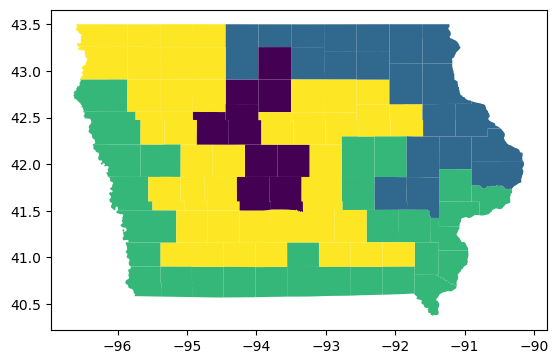

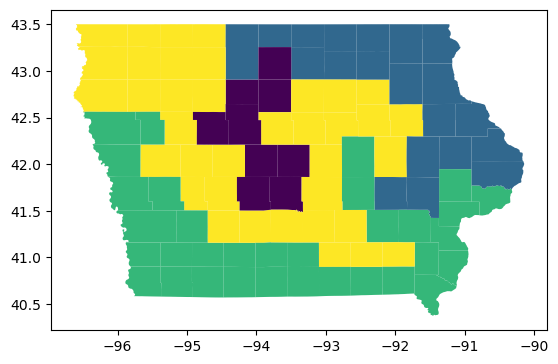

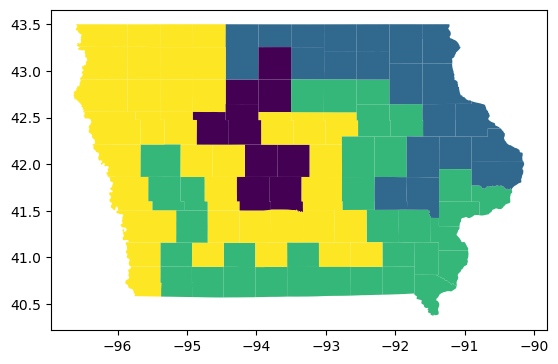

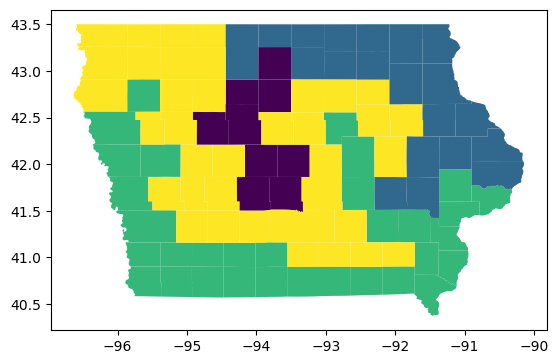

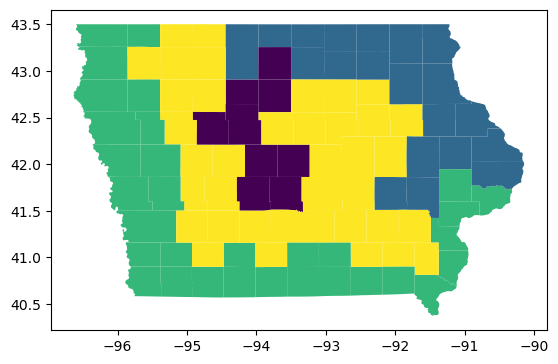

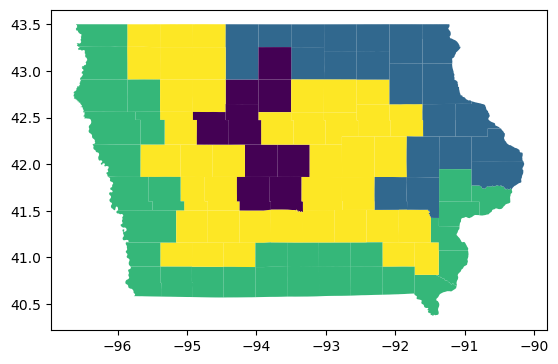

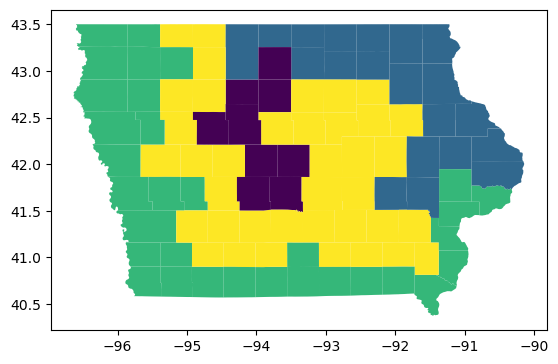

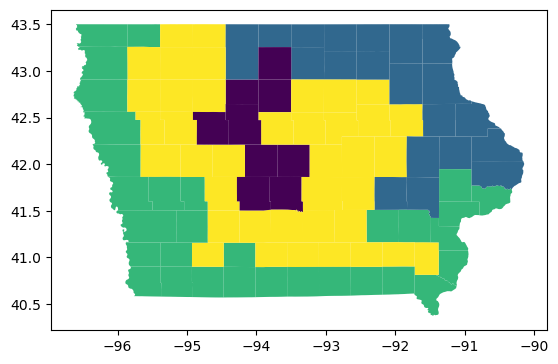

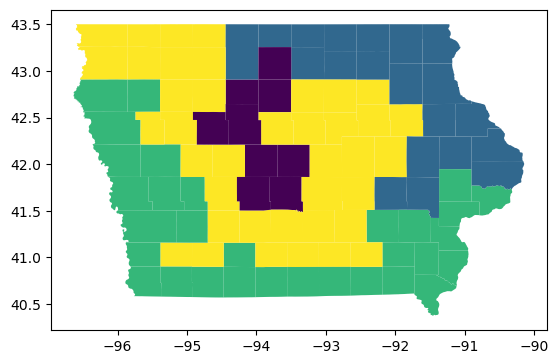

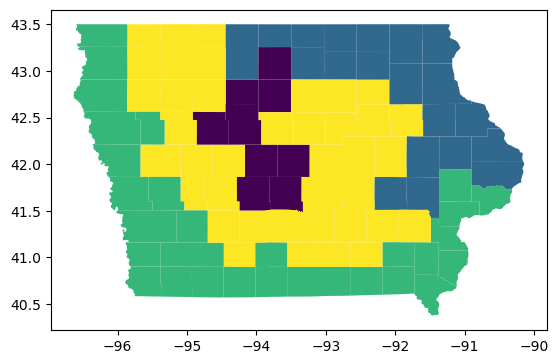

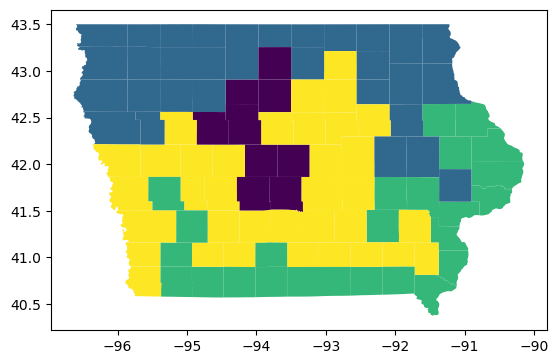

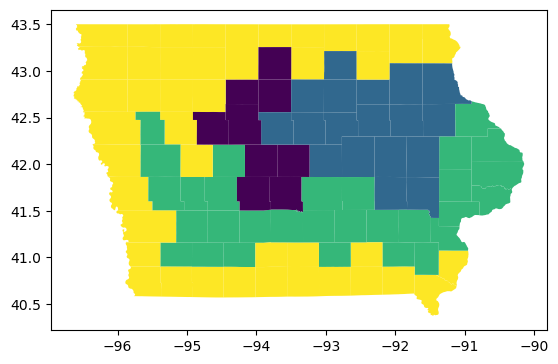

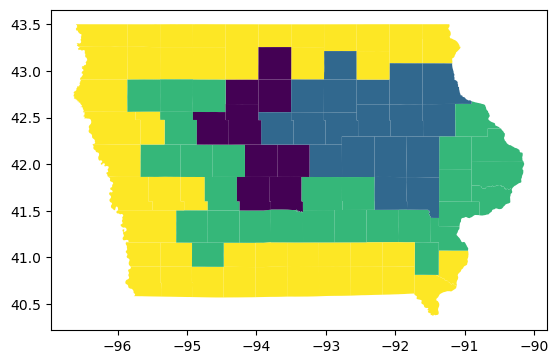

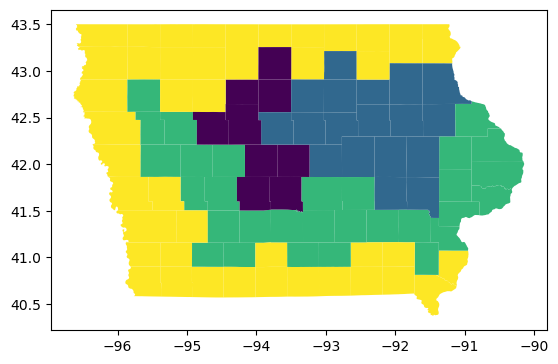

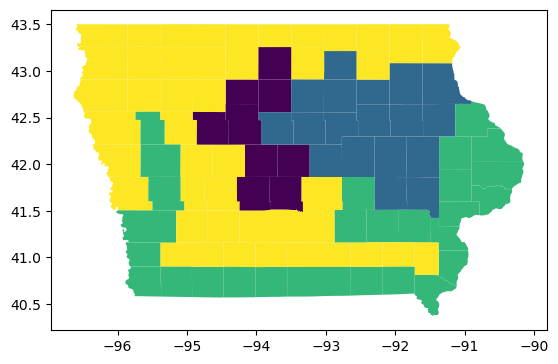

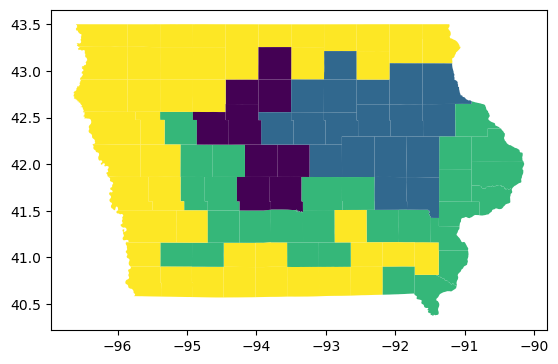

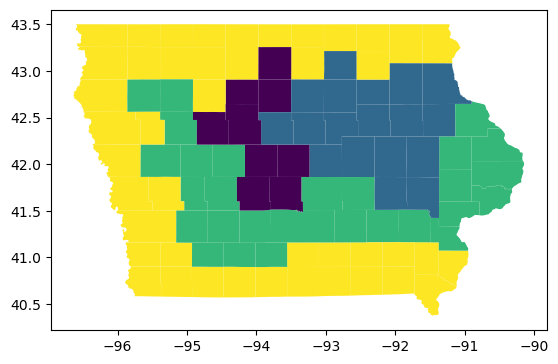

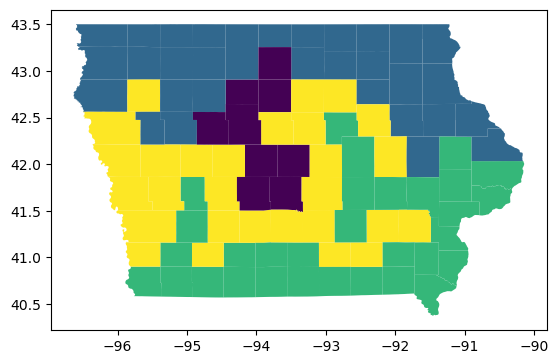

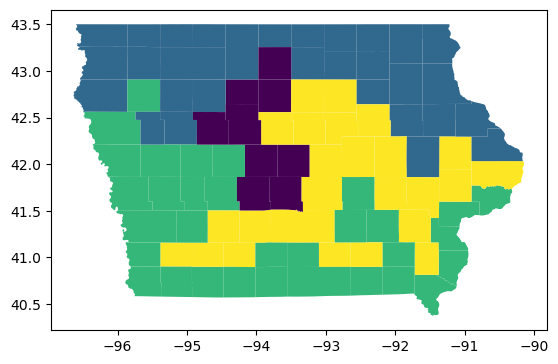

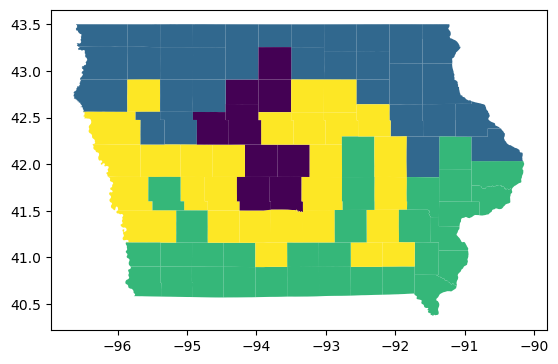

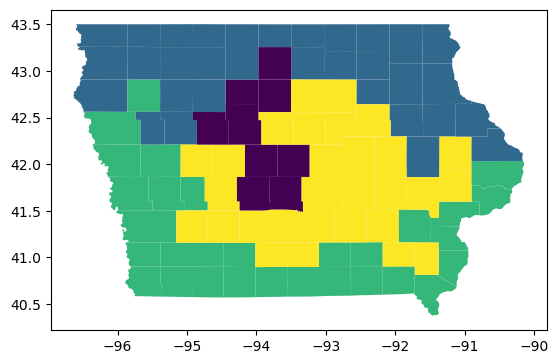

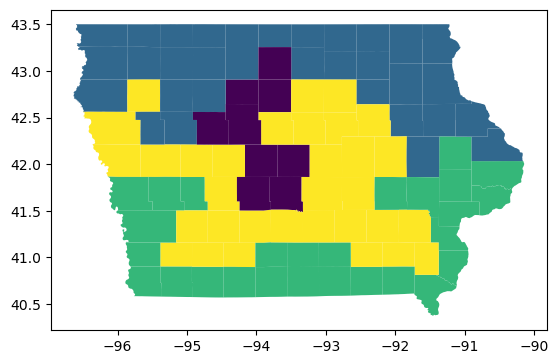

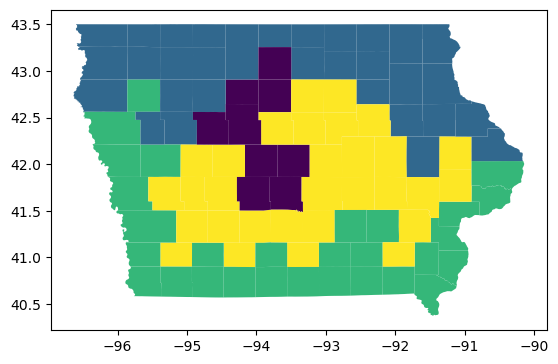

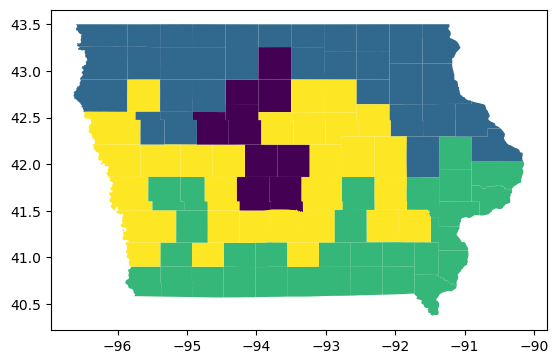

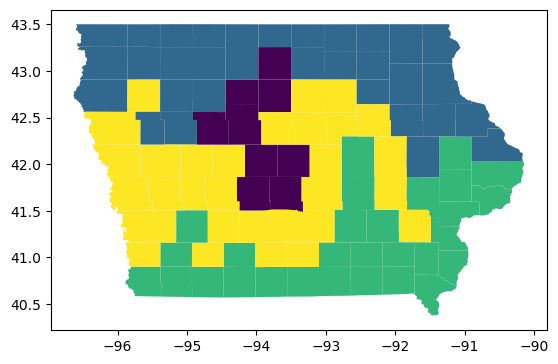

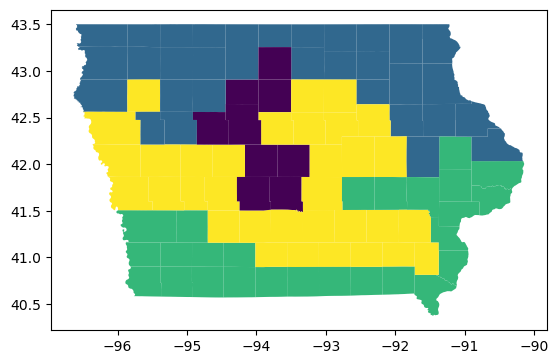

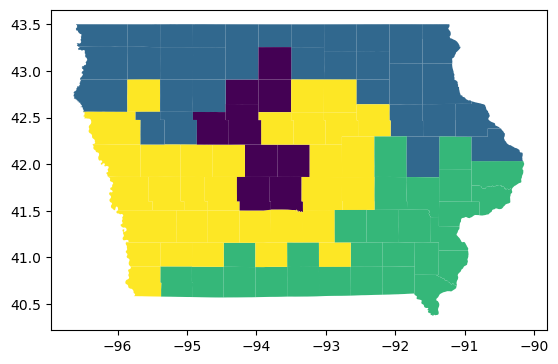

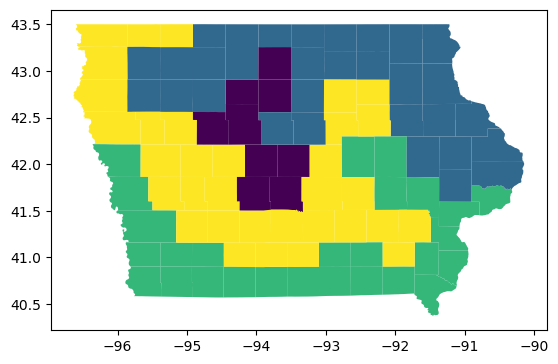

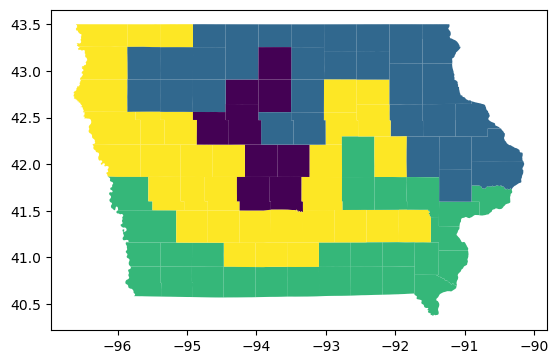

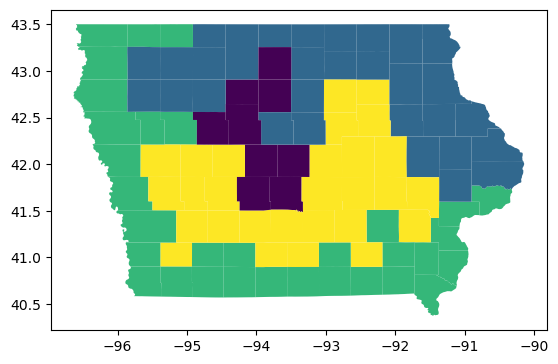

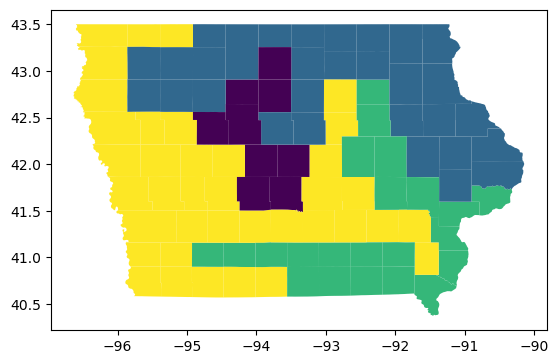

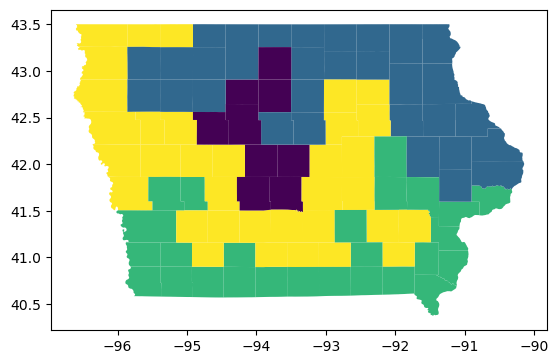

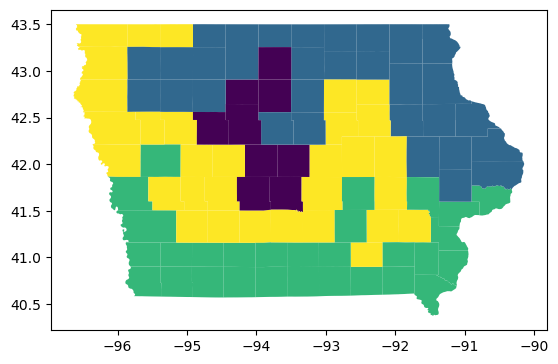

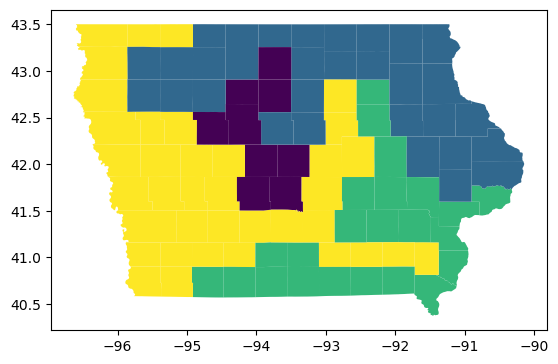

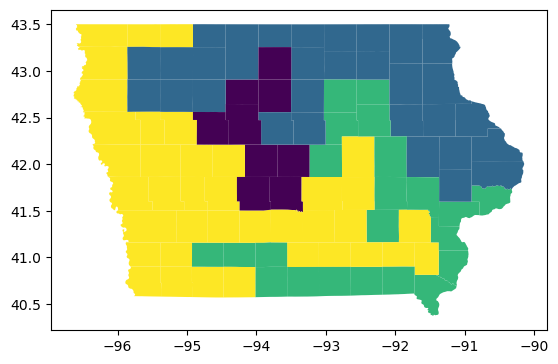

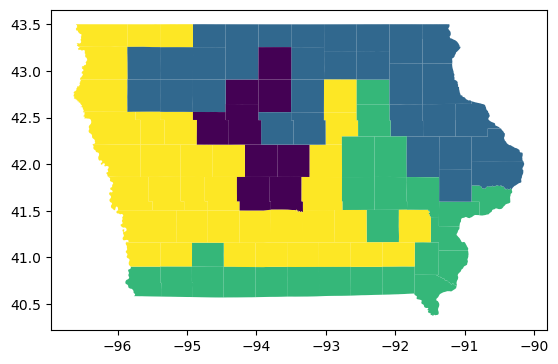

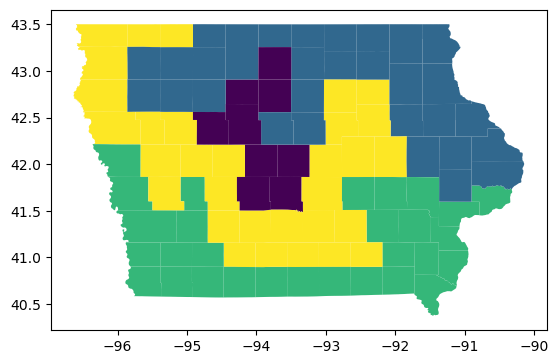

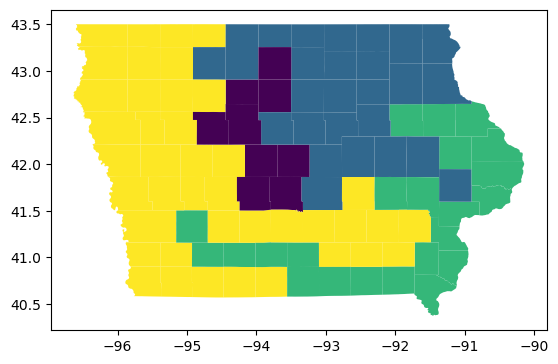

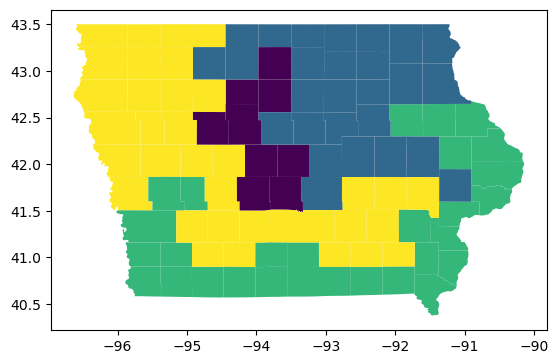

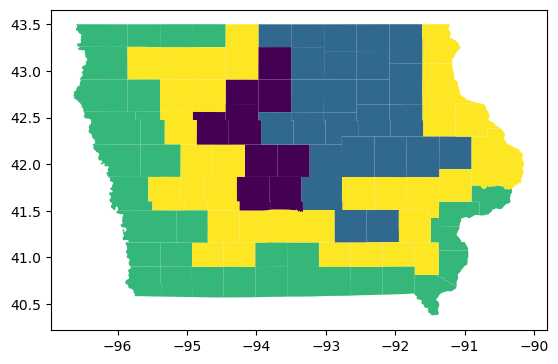

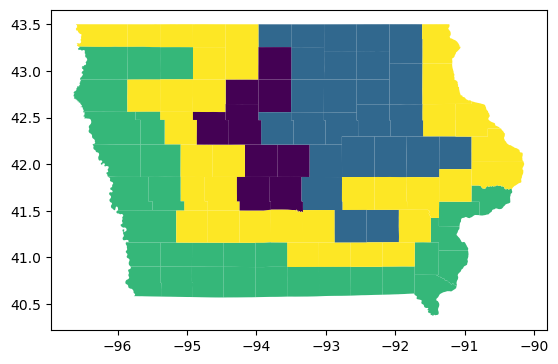

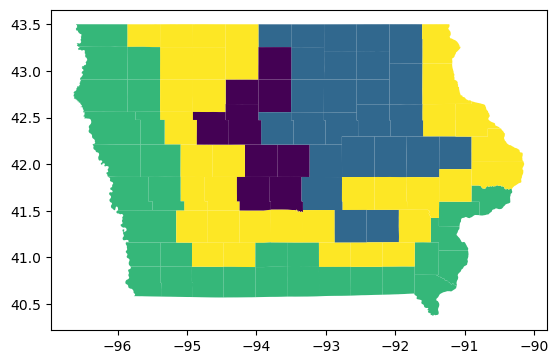

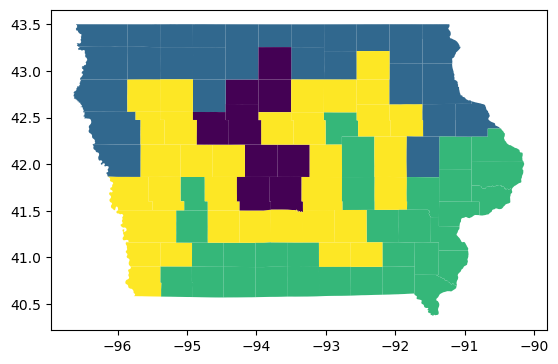

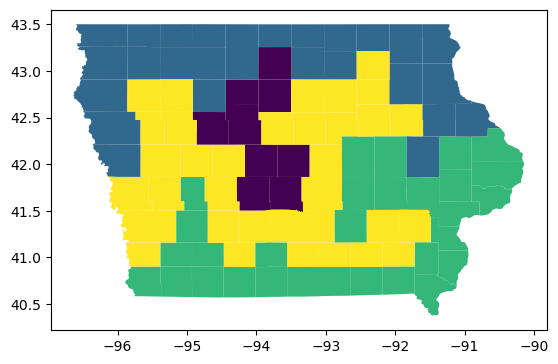

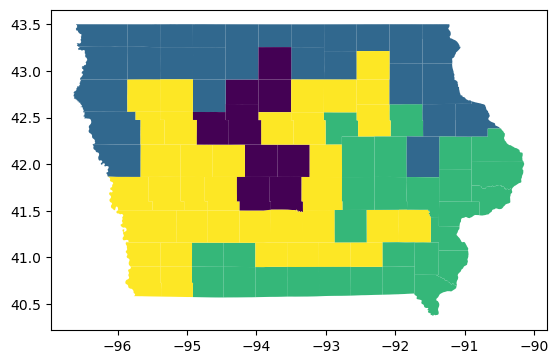

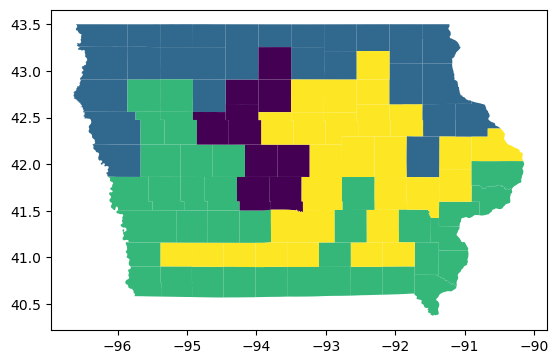

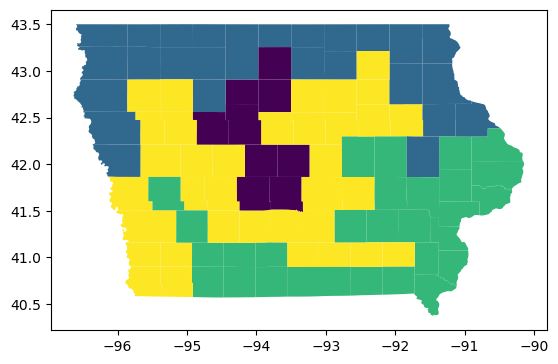

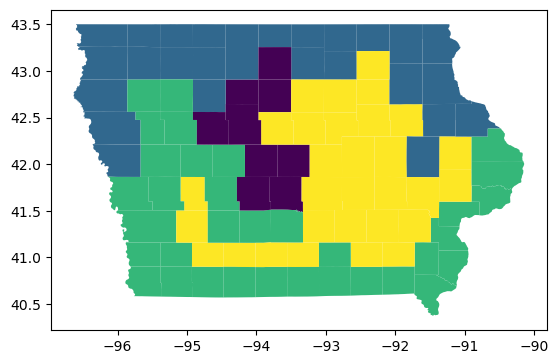

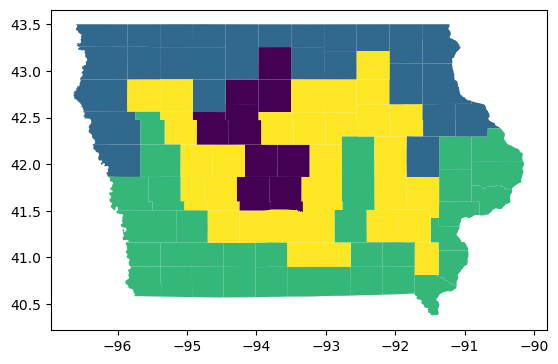

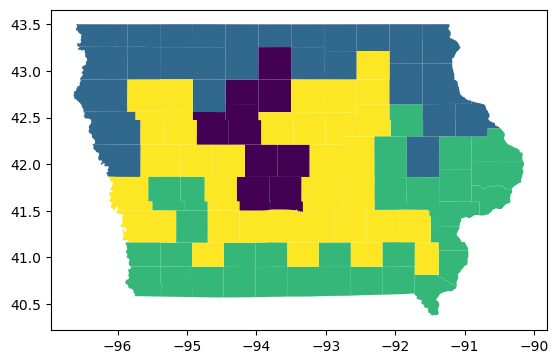

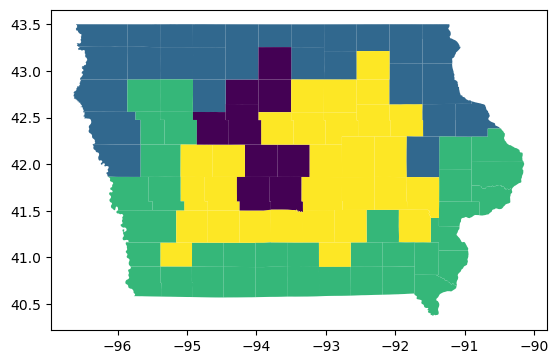

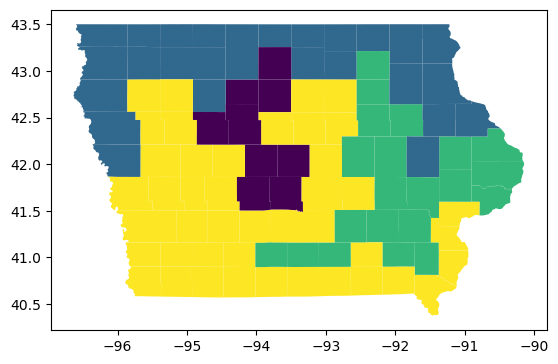

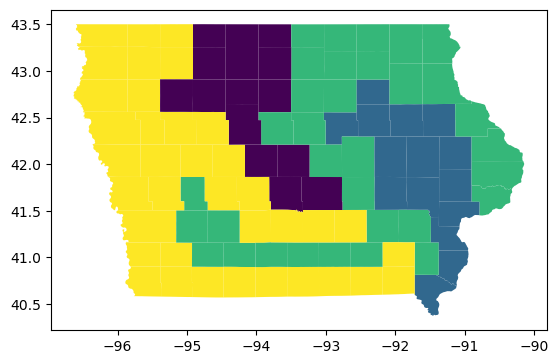

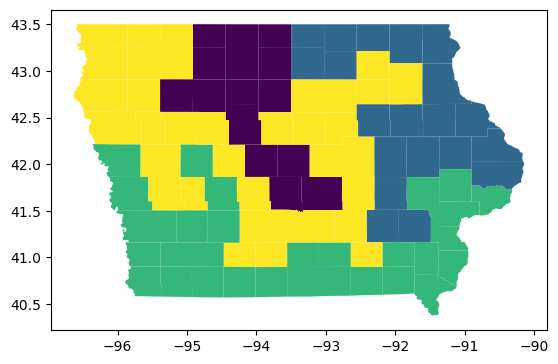

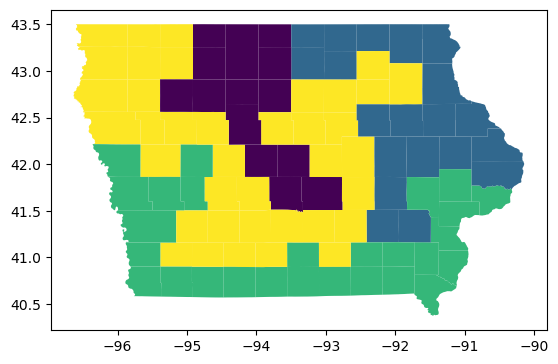

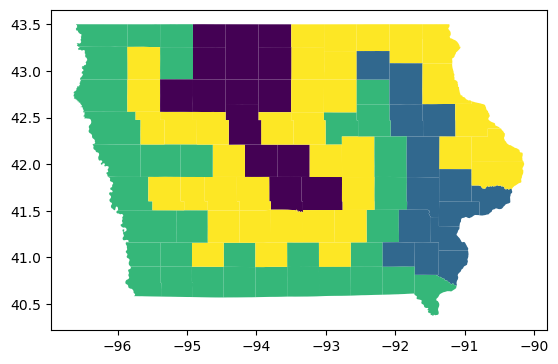

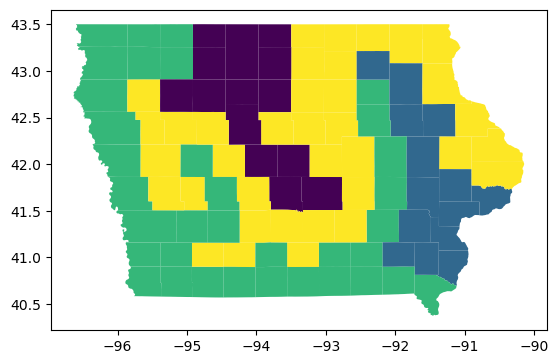

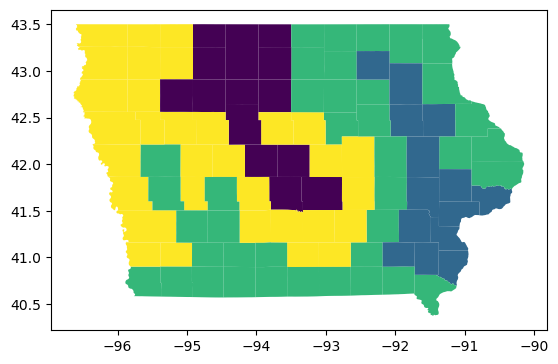

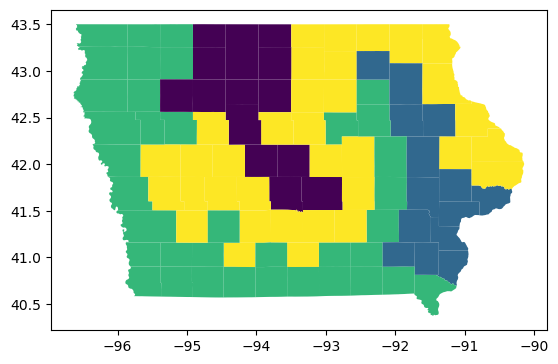

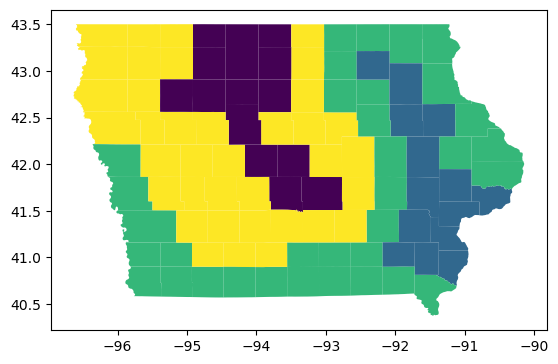

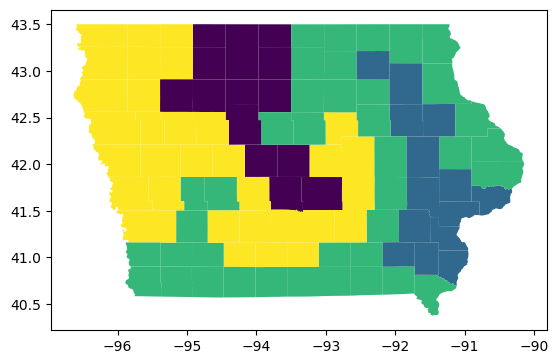

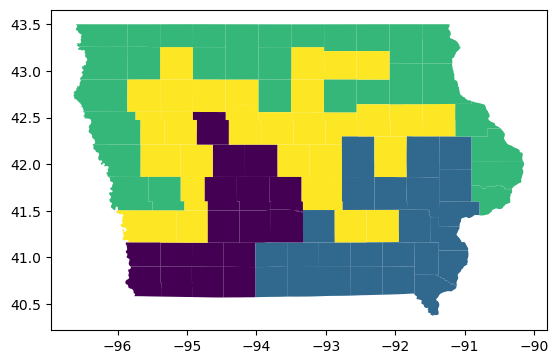

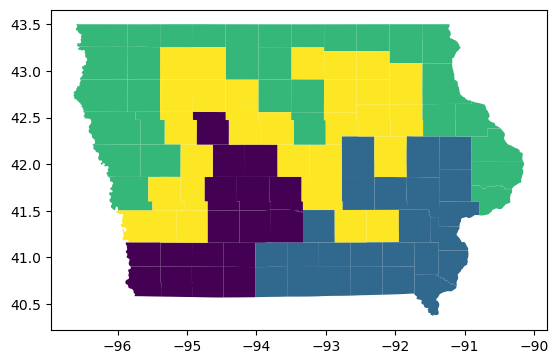

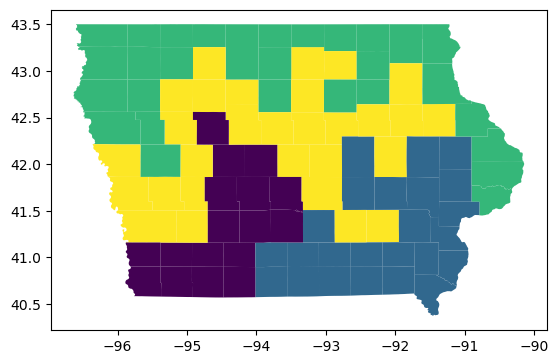

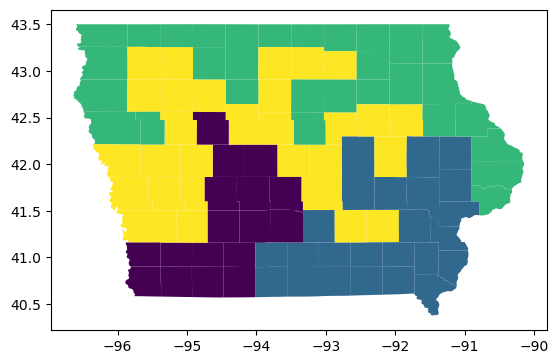

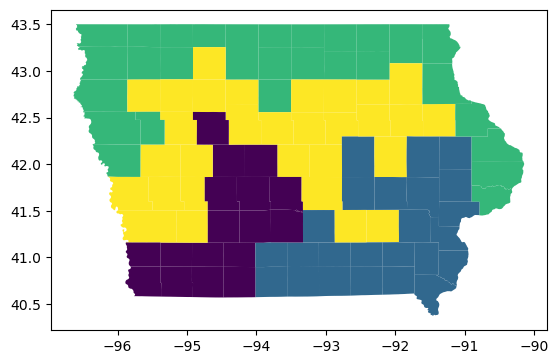

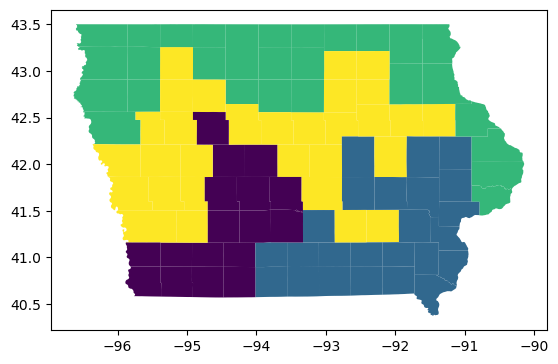

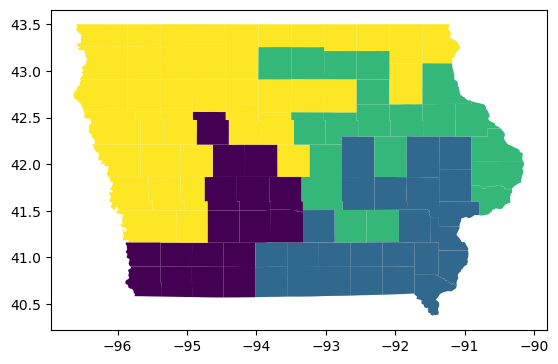

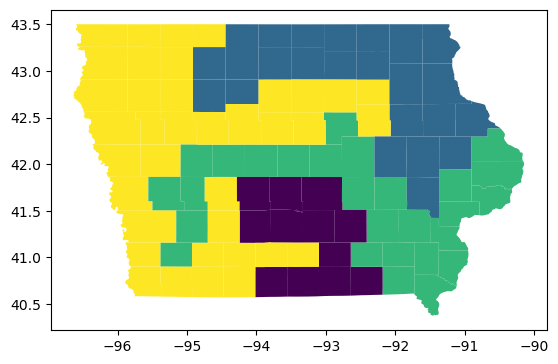

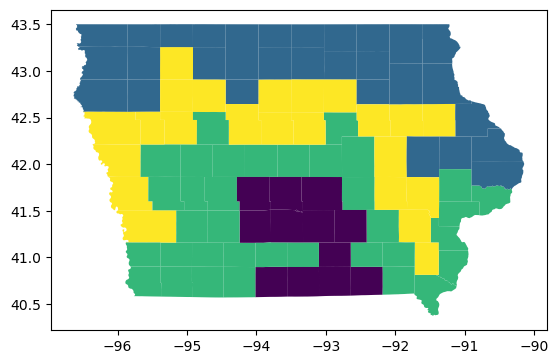

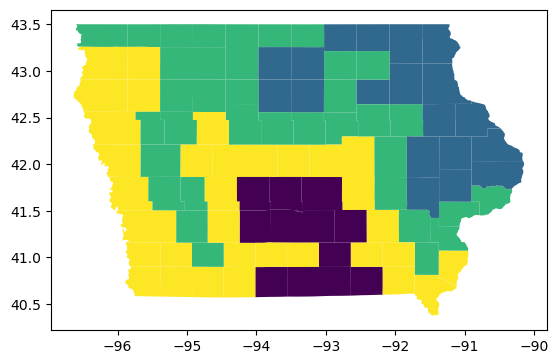

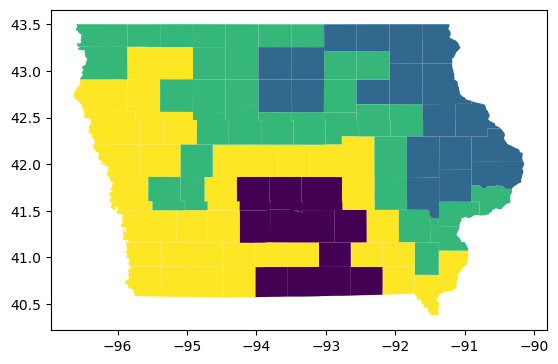

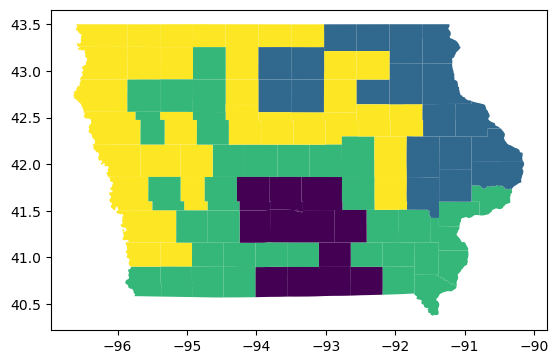

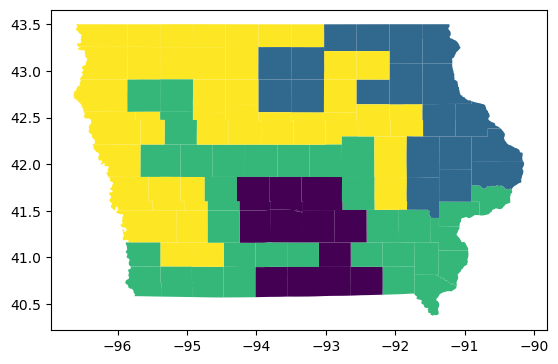

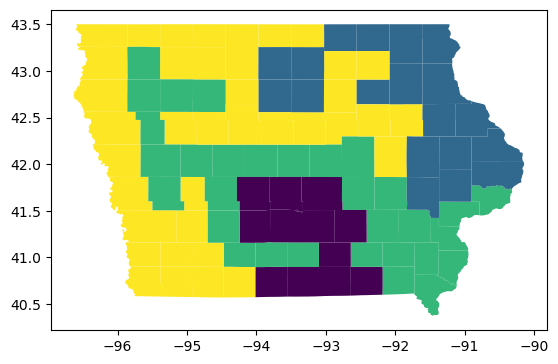

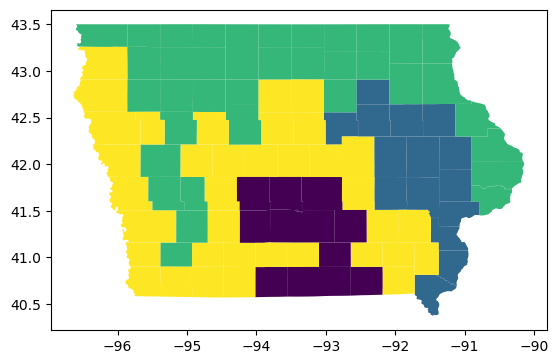

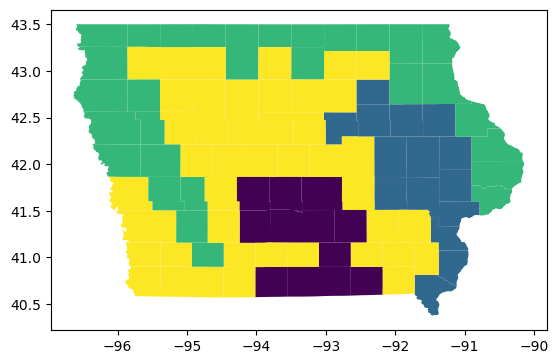

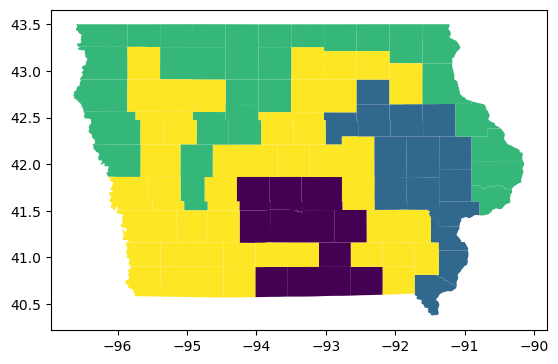

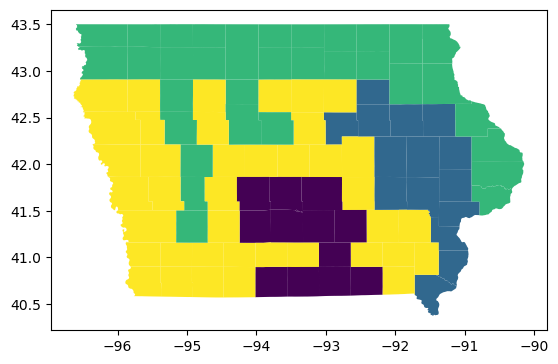

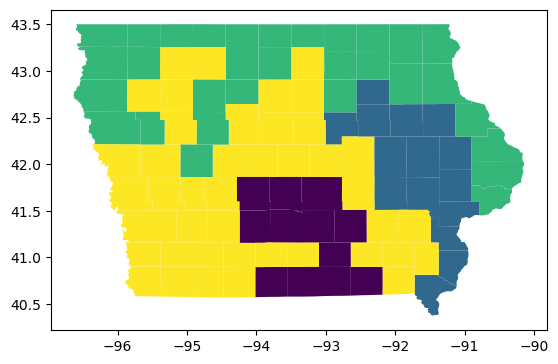

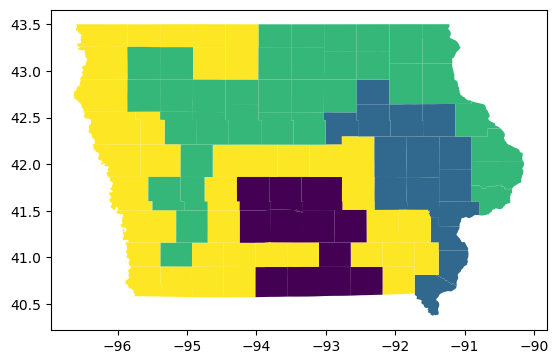

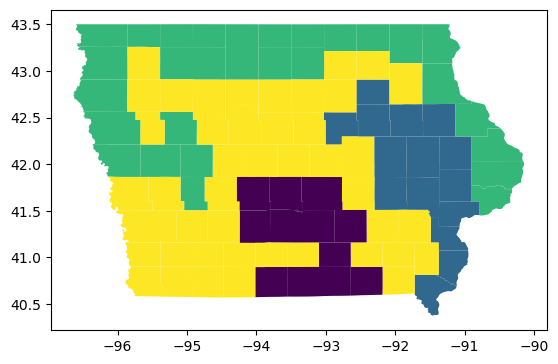

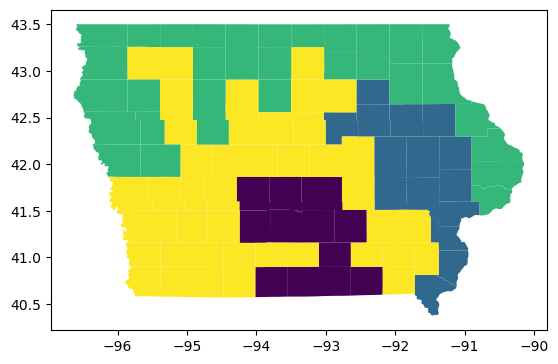

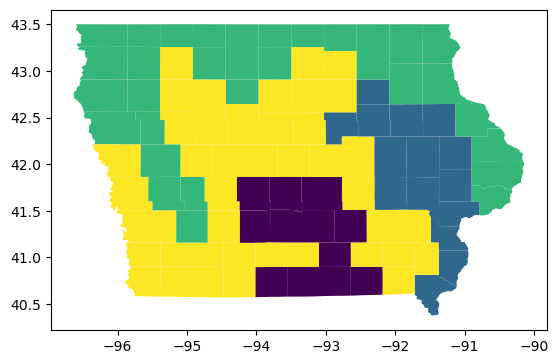

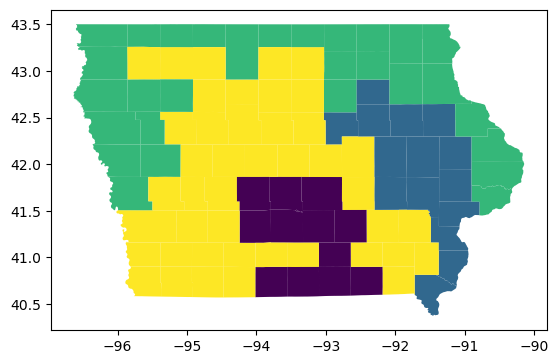

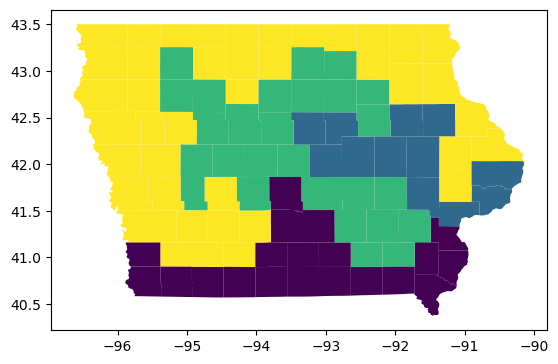

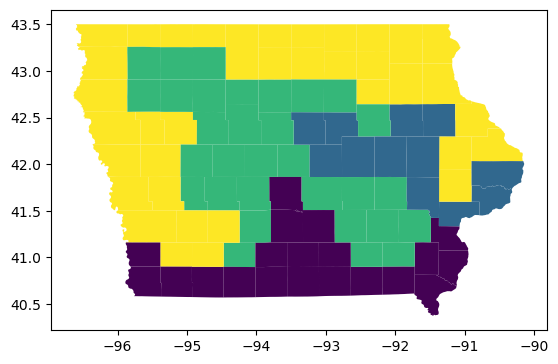

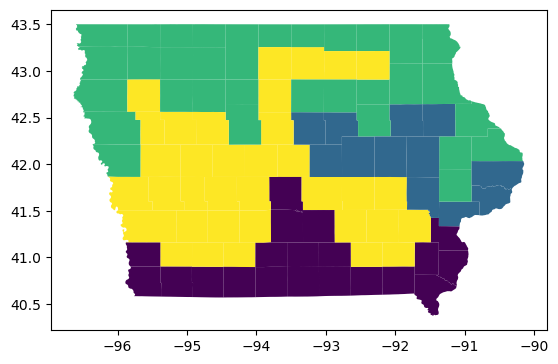

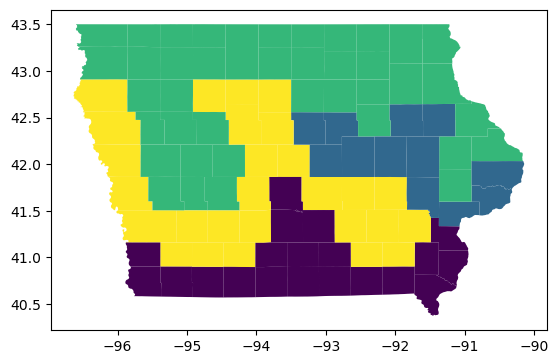

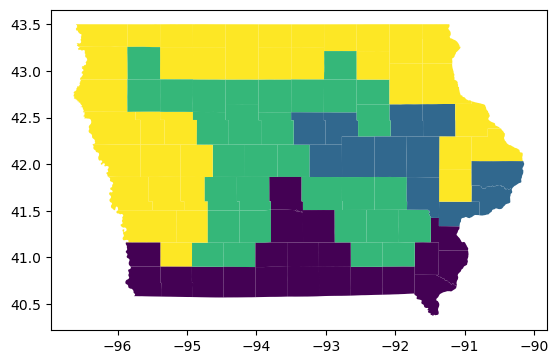

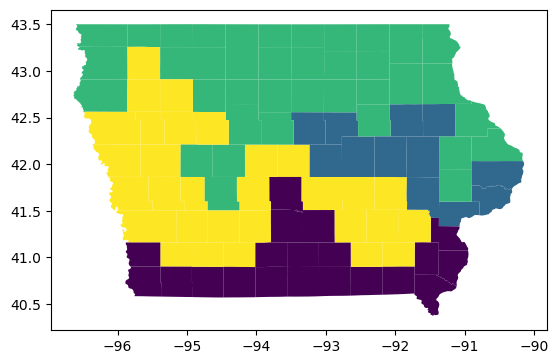

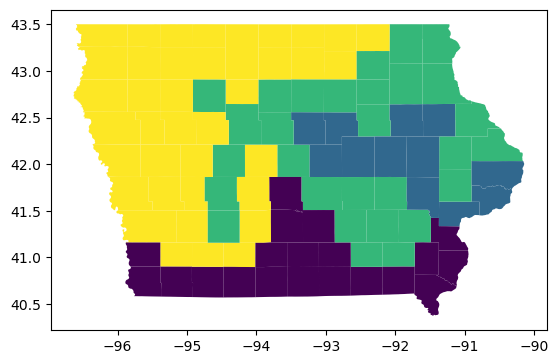

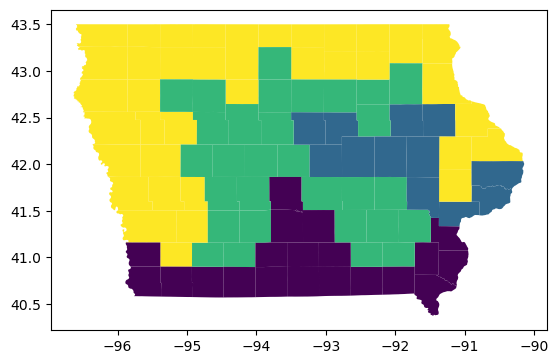

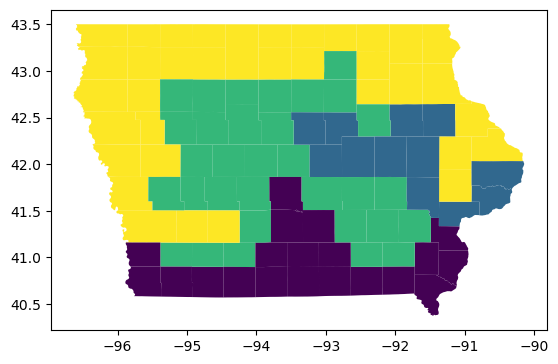

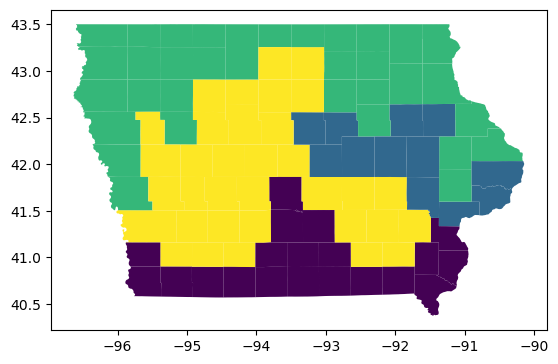

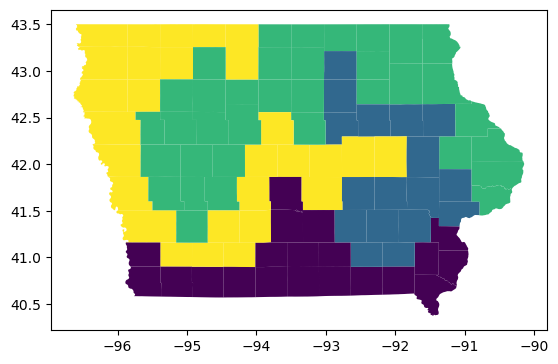

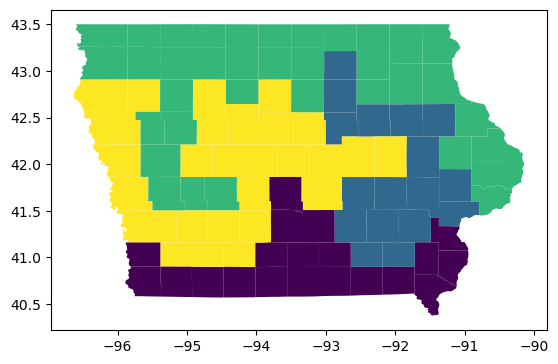

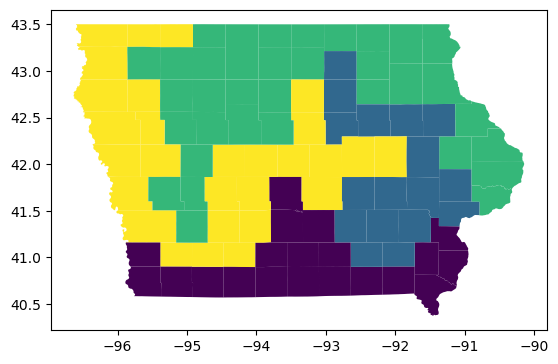

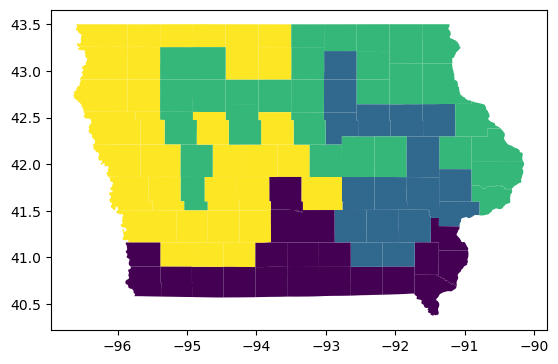

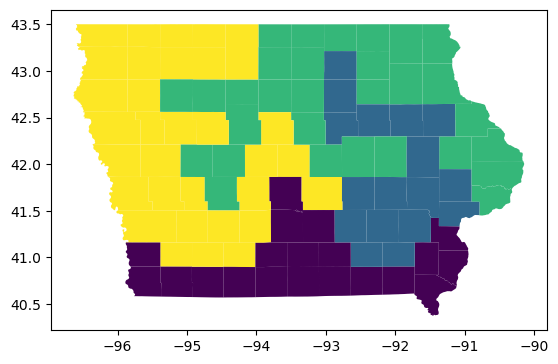

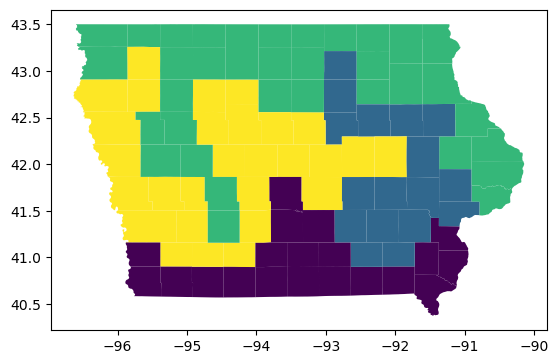

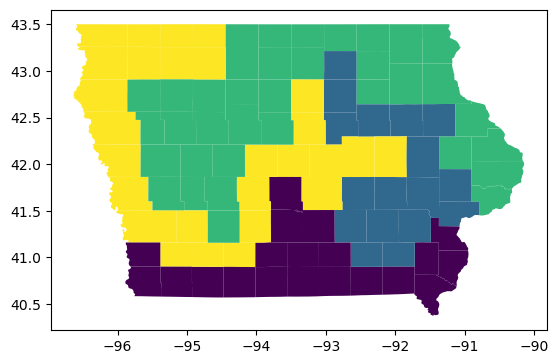

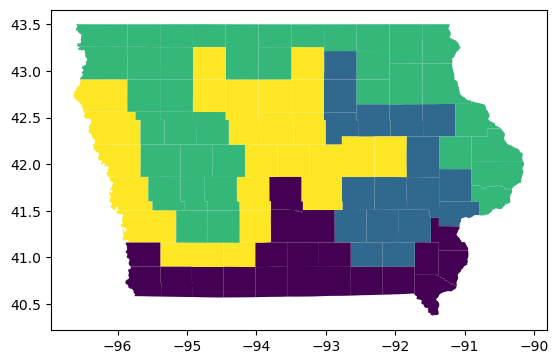

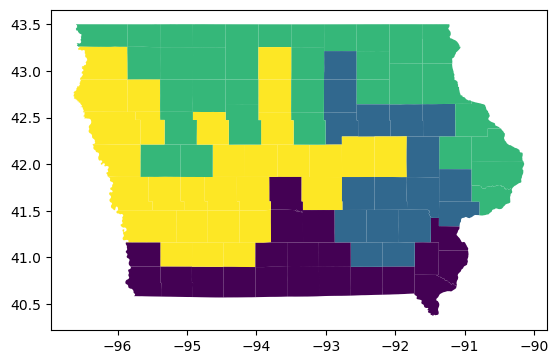

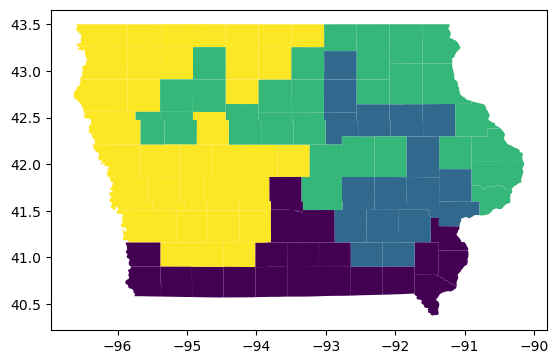

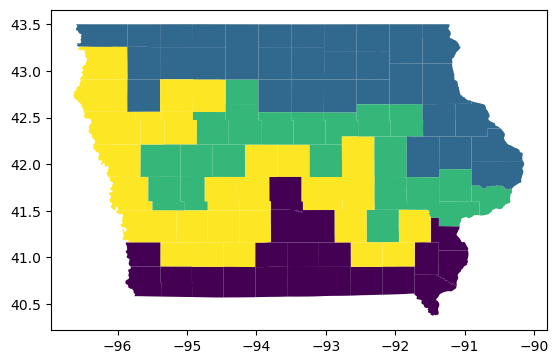

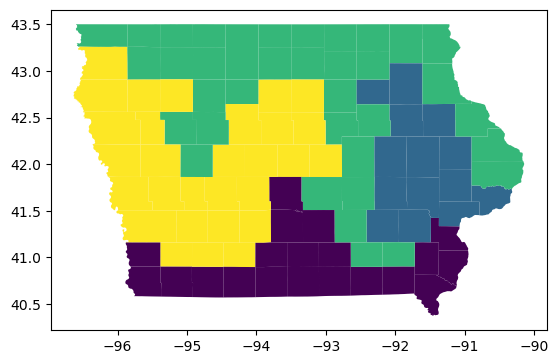

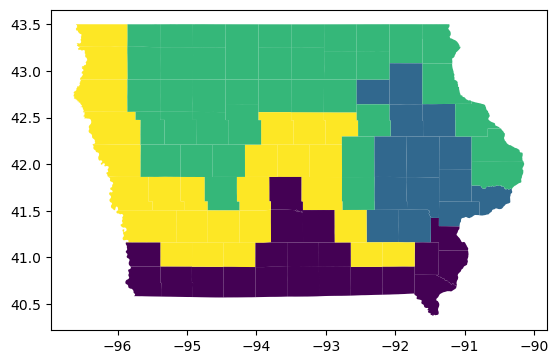

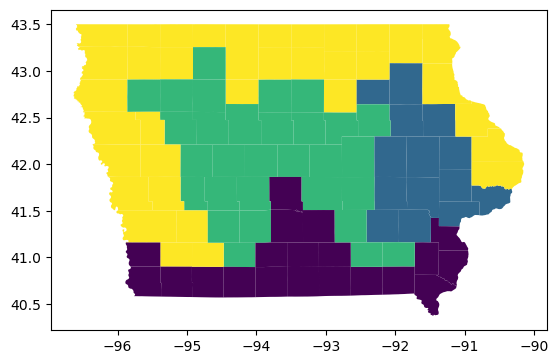

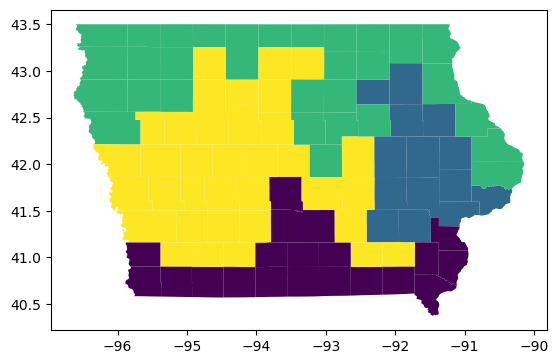

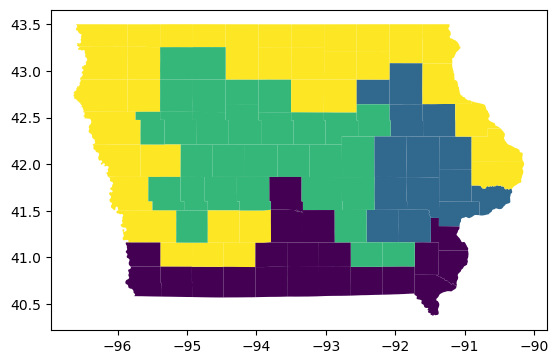

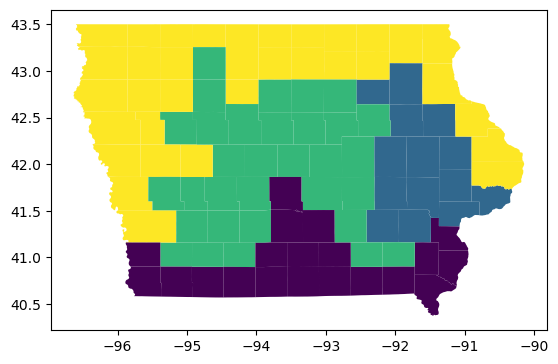

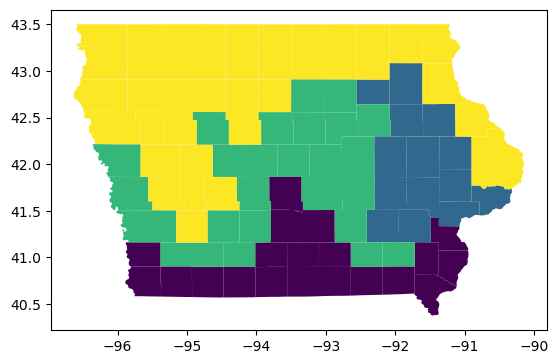

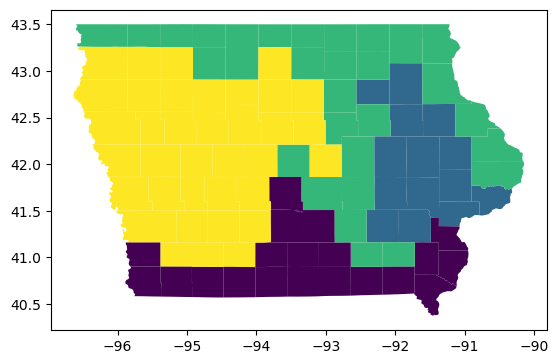

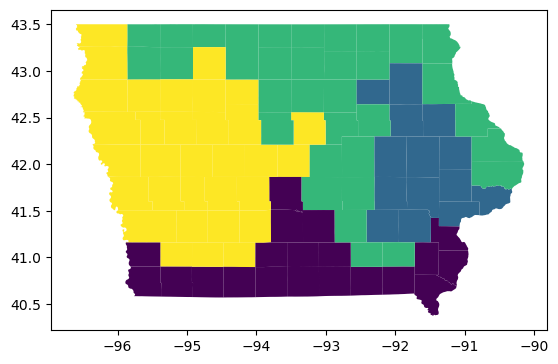

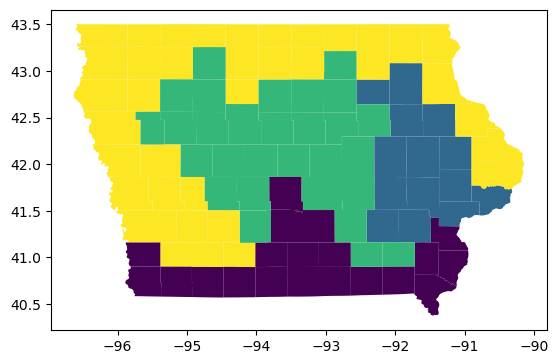

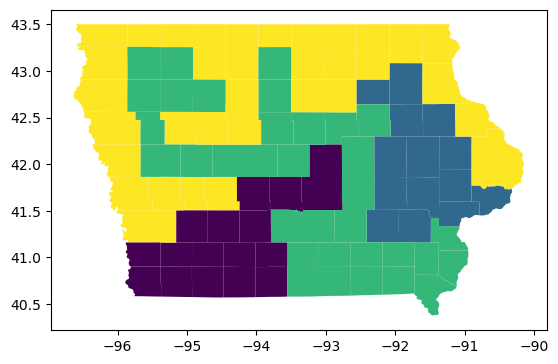

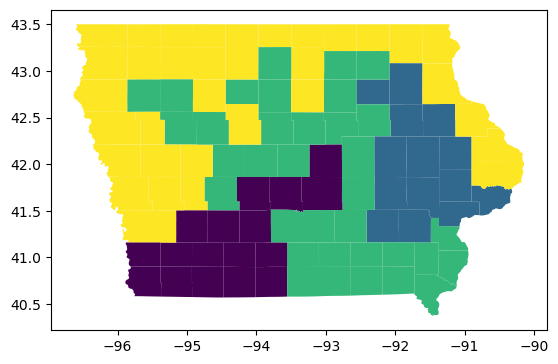

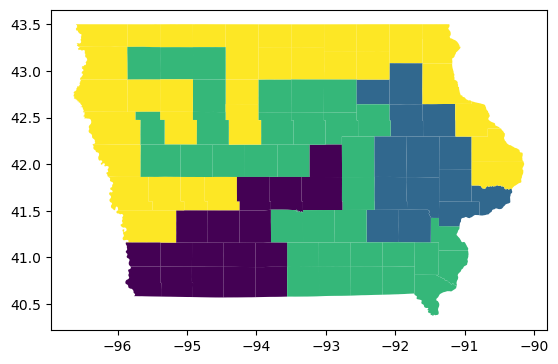

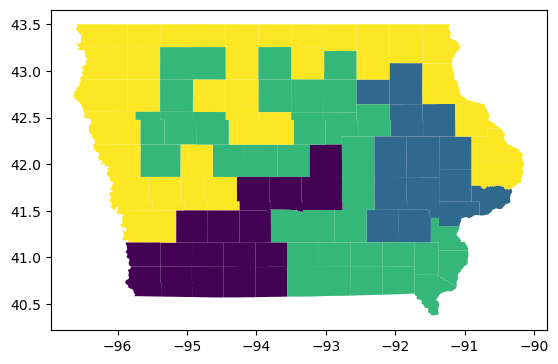

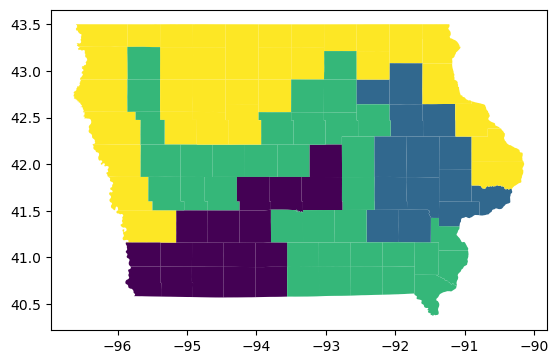

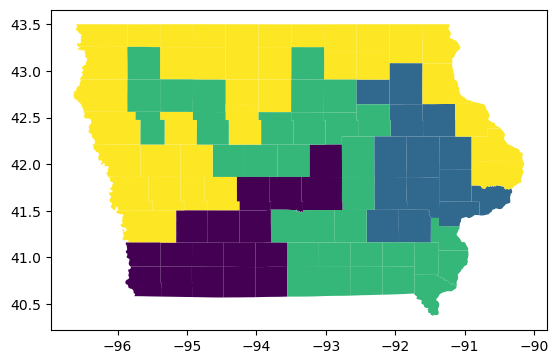

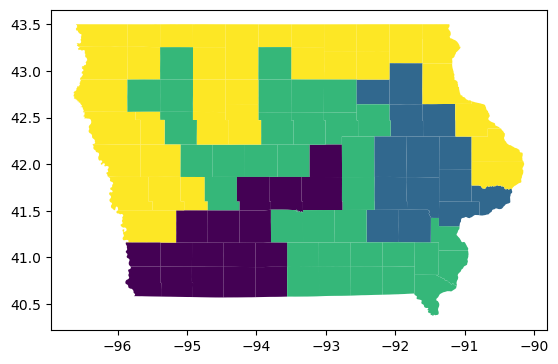

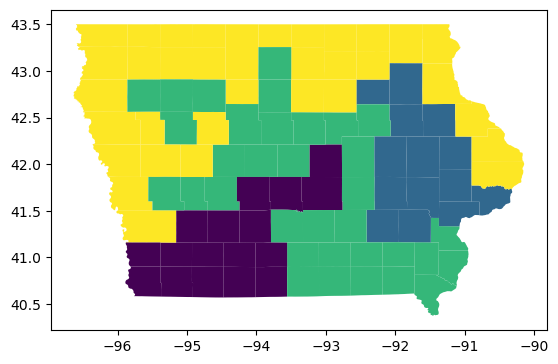

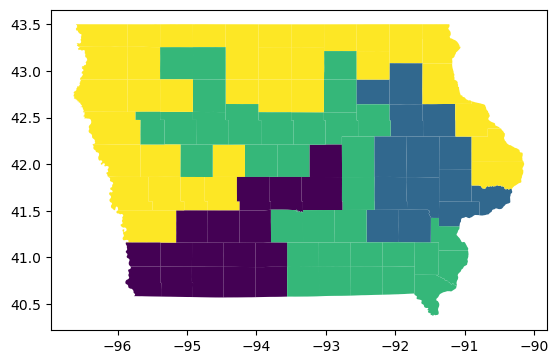

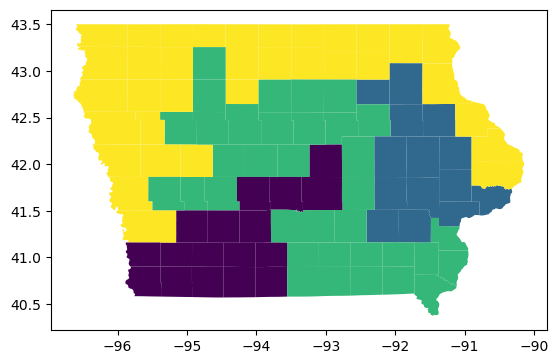

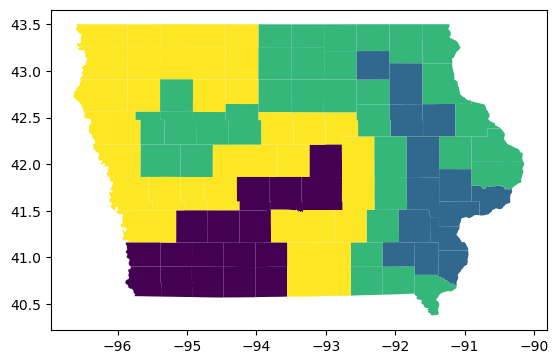

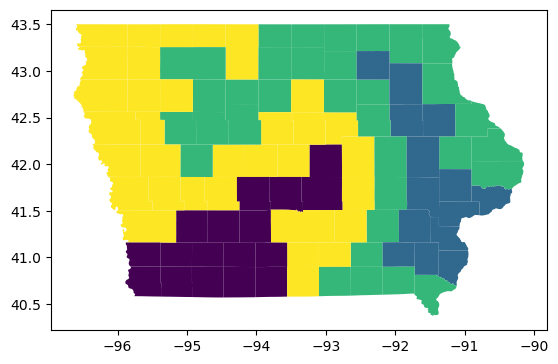

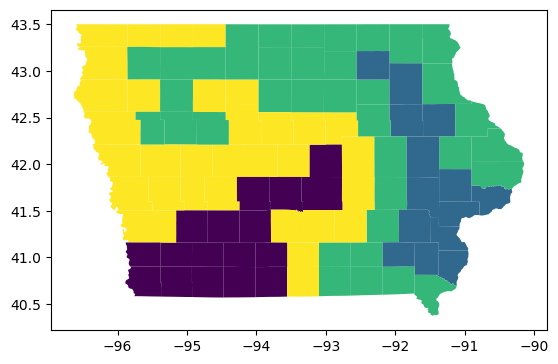

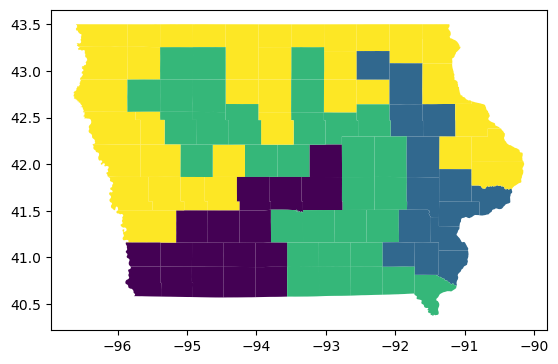

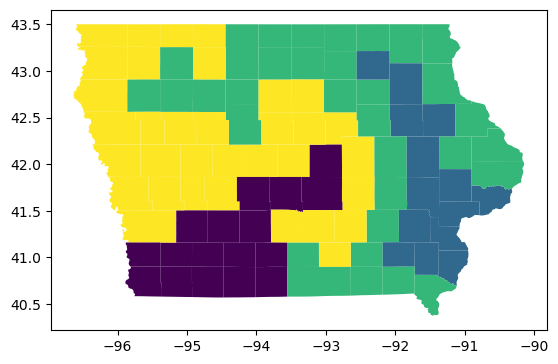

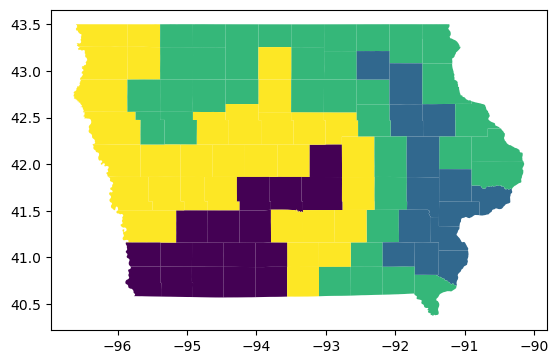

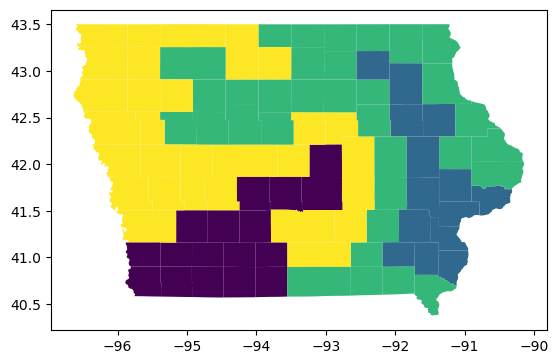

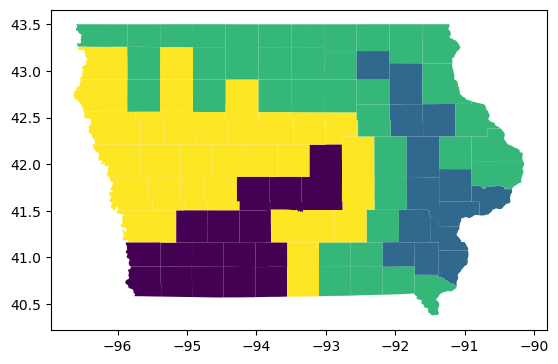

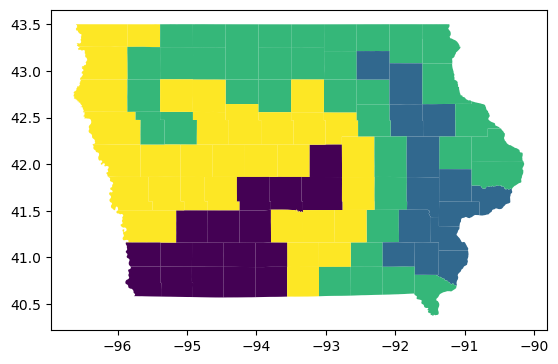

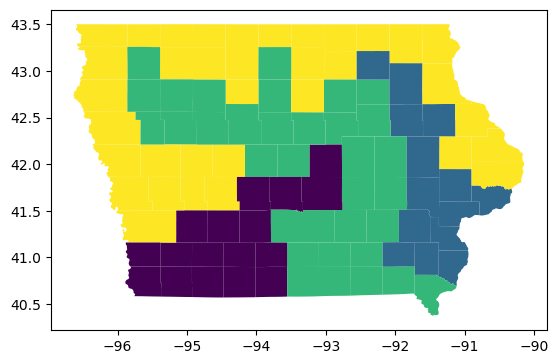

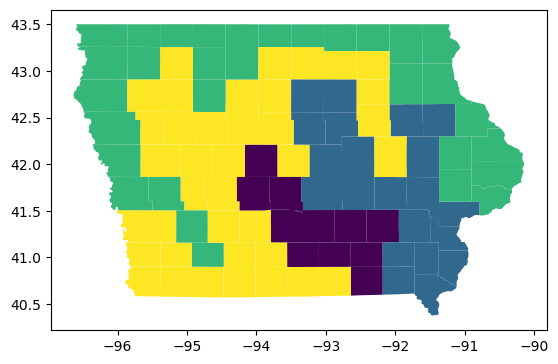

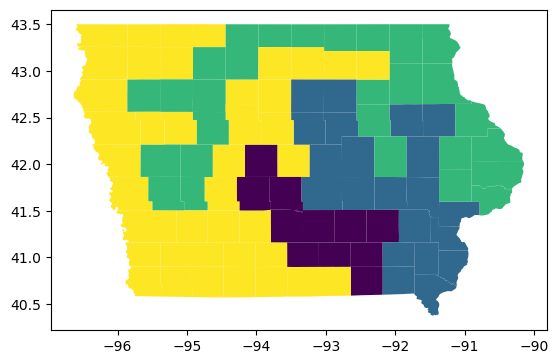

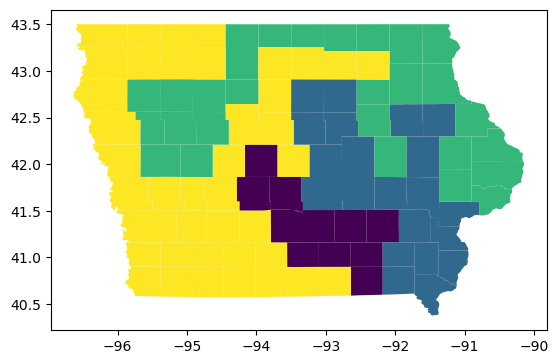

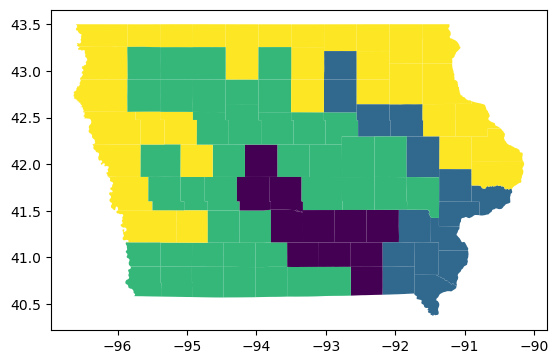

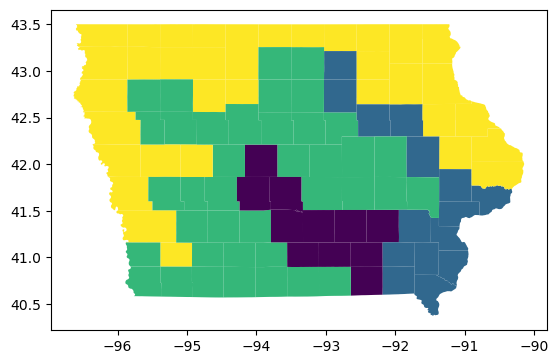

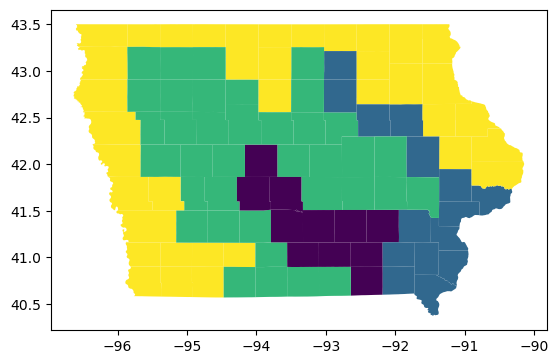

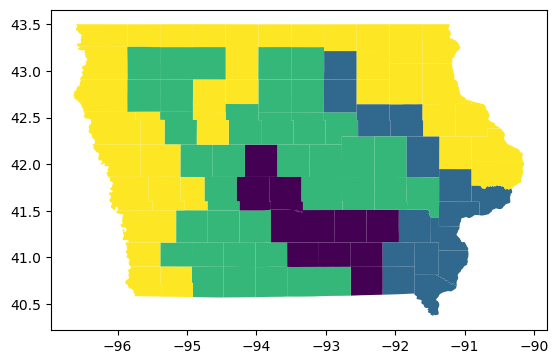

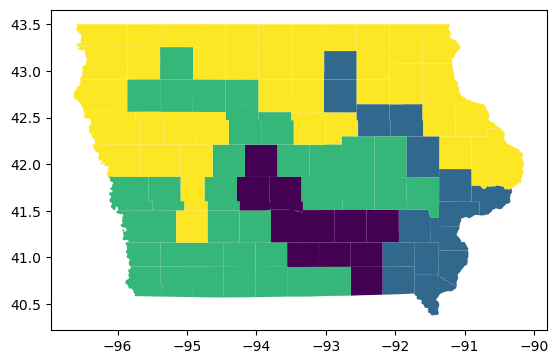

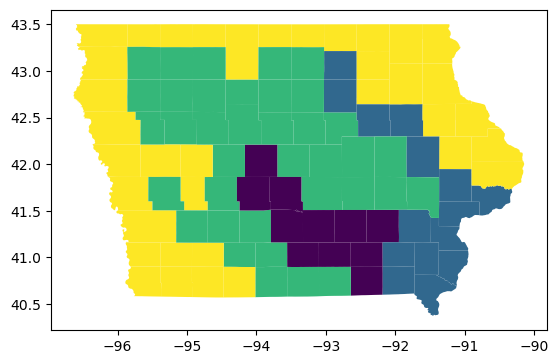

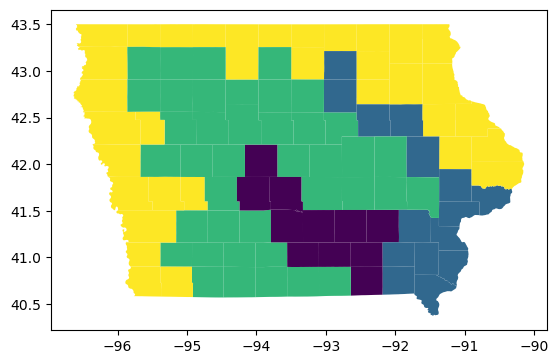

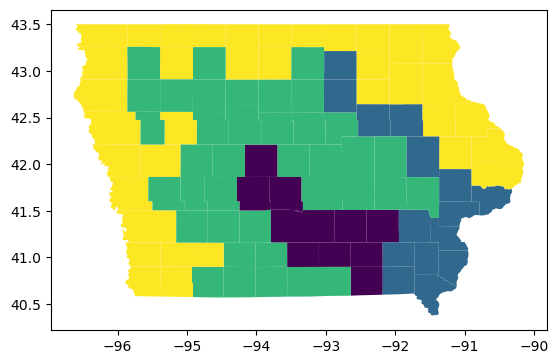

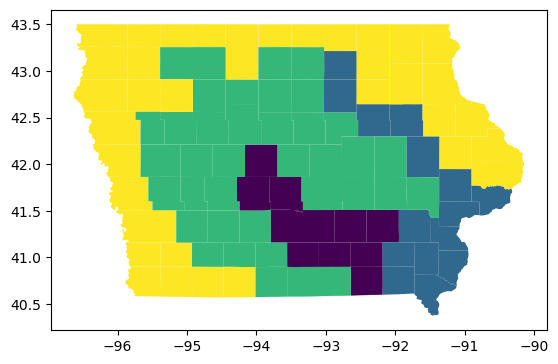

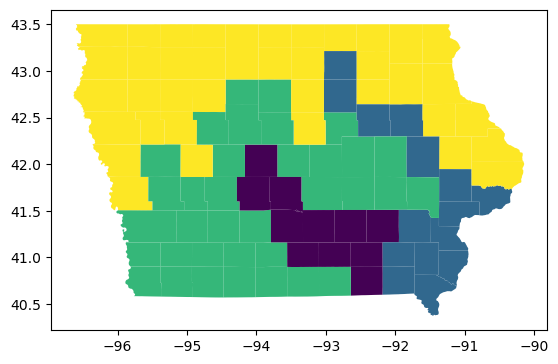

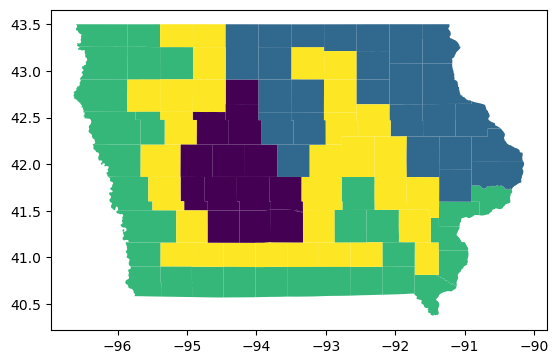

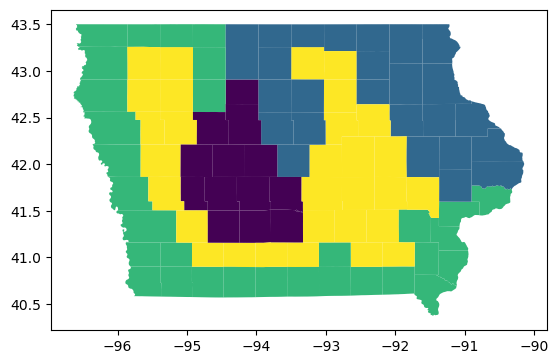

In [7]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) 
    draw_plan( filepath, filename, G, plan )

In [8]:
print("plans =",plans)

plans = [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 39, 42, 44, 45, 47, 48, 54, 60, 61, 65, 71, 83, 85, 86, 92, 96, 97], [1, 2, 6, 9, 10, 14, 16, 18, 23, 29, 30, 32, 34, 35, 37, 38, 40, 41, 46, 49, 50, 51, 52, 53, 55, 58, 59, 62, 63, 67, 68, 70, 75, 76, 78, 79, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 20, 21, 22, 24, 25, 26, 27, 31, 39, 41, 42, 44, 45, 47, 48, 54, 58, 59, 60, 61, 65, 71, 76, 83, 84, 86, 92, 96, 97], [6, 9, 10, 14, 16, 18, 19, 23, 29, 30, 32, 33, 34, 35, 37, 38, 40, 46, 49, 50, 51, 52, 53, 55, 62, 63, 67, 68, 70, 75, 78, 79, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 14, 21, 22, 24, 25, 26, 29, 33, 34, 39, 44, 45, 47, 48, 50, 51, 54, 5